<h2> Airbnb California versus Airbnb Texas</h2>

Airbnb, Inc is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. The company does not own properties but acts as a broker, receiving commissions from each booking. The company is headquartered in Sanfrancisco, United States with offices in 30 other locations.


The company was founded by Joe Gebbia, Brian Chesky, and Nathan Blecharczyk in 2008. The idea kicked off when Gebbia and Chesky used their own place as a bed and breakfast to make a few extra money to pay rent. They saw potential market for their idea with the big design conferences coming to the San Francisco area and a city full of sold-out hotels at that time. They developed a website called airbedandbreakfast.com which is known today as Airbnb.


 <p>Using the datasets describing the calendar, listing and review activities of Airbnb homes in Austin and 
    San Francisco, we will analyse the following questions in two phases:</p>

<h3>Phase one</h3>
 <ul>
    <li>Which cities have more expensive homestay accross different times of the year(Austin or San francisco) per availability?</li> 
    <li>Do I stand the chance to incure more cost on the request for additional services?</li>
    <li> Where will I obtain better services for a price of 200 dollars per night: SF or Austin?</li>
    <li> What is the popularity of room types in San Francisco versus Austin?</li>
    <li>In the situation whereby my plans changed, which of the cities is more lenient with cancellation policy</li>

 </ul>
 
<h3>Phase two</h3>
  <ul>
     <li> What reviews can be taken as positive or negative from property renters?</li>
  </ul>  
 

# Prepare Data

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as cal
import seaborn as sns
import matplotlib as mpl

dpi_value = 125
%matplotlib inline

In [2]:
# import data
sanfrancisco_calendar = pd.read_csv('./data/sanfrancisco_calendar.csv')
sanfrancisco_listings = pd.read_csv('./data/sanfrancisco_listings.csv', low_memory=False)
austin_calendar = pd.read_csv('./data/austin_calendar.csv')
austin_listings = pd.read_csv('./data/austin_listings.csv', low_memory=False)

# Understand Data

In [3]:
# check the number of rows, columns and features of the San Francisco's calendar dataset
sanfrancisco_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   listing_id      65534 non-null  int64 
 1   date            65534 non-null  object
 2   available       65534 non-null  object
 3   price           65534 non-null  object
 4   adjusted_price  65534 non-null  object
 5   minimum_nights  65534 non-null  int64 
 6   maximum_nights  65534 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.5+ MB


In [4]:
#List of sanfrancisco_calendar column headers
list(sanfrancisco_calendar.columns.values)

['listing_id',
 'date',
 'available',
 'price',
 'adjusted_price',
 'minimum_nights',
 'maximum_nights']

In [5]:
# check the number of rows, columns and features of the Austin's calendar dataset
austin_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   listing_id      65534 non-null  int64 
 1   date            65534 non-null  object
 2   available       65534 non-null  object
 3   price           65534 non-null  object
 4   adjusted_price  65534 non-null  object
 5   minimum_nights  65534 non-null  int64 
 6   maximum_nights  65534 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.5+ MB


In [6]:
#List of austin_calendar column headers
list(austin_calendar.columns.values)

['listing_id',
 'date',
 'available',
 'price',
 'adjusted_price',
 'minimum_nights',
 'maximum_nights']

In [7]:
# check the number of rows, columns and features of the San Francisco's listings dataset
sanfrancisco_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8138 entries, 0 to 8137
Columns: 106 entries, id to reviews_per_month
dtypes: float64(20), int64(23), object(63)
memory usage: 6.6+ MB


In [8]:
#List of sanfrancisco_listings column headers
list(sanfrancisco_listings.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [9]:
# check the number of rows, columns and features of the Austin's listings dataset
austin_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11668 entries, 0 to 11667
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(22), object(61)
memory usage: 9.4+ MB


In [10]:
#List of austin_listings column headers
list(austin_listings.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [11]:
# Check the first five rows of the San francisco's calendar data
sanfrancisco_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2020-04-08,f,$115.00,$115.00,1,1125
1,958,2020-04-09,f,$115.00,$115.00,1,1125
2,958,2020-04-10,f,$115.00,$115.00,1,1125
3,958,2020-04-11,f,$115.00,$115.00,1,1125
4,958,2020-04-12,f,$115.00,$115.00,1,1125


In [12]:
# Check the first five rows of the Austin's calendar data
austin_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,155359,2020-03-17,f,$90.00,$90.00,90,830
1,154103,2020-03-17,f,$475.00,$475.00,3,60
2,154103,2020-03-18,f,$475.00,$475.00,3,60
3,154103,2020-03-19,t,$475.00,$475.00,3,60
4,154103,2020-03-20,t,$475.00,$475.00,3,60


In [13]:
# Check the first five rows of the San francisco's listings data
sanfrancisco_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200407152614,2020-04-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.84
1,5858,https://www.airbnb.com/rooms/5858,20200407152614,2020-04-09,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.83
2,7918,https://www.airbnb.com/rooms/7918,20200407152614,2020-04-08,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20200407152614,2020-04-08,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.12
4,8339,https://www.airbnb.com/rooms/8339,20200407152614,2020-04-07,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,moderate,t,t,2,2,0,0,0.22


In [14]:
# Check the first five rows of the Austin's listings data
austin_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,https://www.airbnb.com/rooms/5245,20200317143754,2020-03-17,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,5456,https://www.airbnb.com/rooms/5456,20200317143754,2020-03-17,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,Cute Private Studio apartment located in Willo...,Great central location for walking to Convent...,none,My neighborhood is ideally located if you want...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.94
3,5769,https://www.airbnb.com/rooms/5769,20200317143754,2020-03-17,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,f,moderate,t,t,1,0,1,0,2.12
4,6413,https://www.airbnb.com/rooms/6413,20200317143754,2020-03-17,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...",!!!!! SXSW info !!!!! Presently open (again!) ...,"Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90


# Clean Data

<p>Data cleaning is a vital process in data science. Its a process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. In most cases, the eliminated data does not contribute meaningfully to data analysis because they are not useful indicators and they usually generate inaccurate results.  </p> 

<p>The calendar datasets have no missing data but for the listings datasets we will be removing missing values(NaN) where necessary. The reason being that there are no generic standards for handling missing data especially when it comes to dropping values. This is dependent on your data types and what you actually intend doing with the data(insight). We will also perform some data wrangling in a that befits our proposed analysis.</p>

In [15]:
def check_null_columns(df):
    '''List all columns with missing values
    
    Input:
        df: Dataframe

    Returns:
        Dataframe: a dataframe with column names, number of missing values, and percentage of missing values
    '''
    cols = df.columns[df.isnull().sum() >= 0]
    df_null = pd.DataFrame(df[cols].isnull().sum().sort_values(), columns=['Number of Nulls'])
    df_null['% of Nulls'] = df[cols].isnull().mean().sort_values() * 100
    
    return df_null


In [16]:
# check all columns with missing values in sanfrancisco_listings
check_null_columns(sanfrancisco_listings)

,Number of Nulls,% of Nulls
id,0,0.000000
minimum_maximum_nights,0,0.000000
maximum_minimum_nights,0,0.000000
minimum_minimum_nights,0,0.000000
maximum_nights,0,0.000000
...,...,...
square_feet,8023,98.586876
thumbnail_url,8138,100.000000
medium_url,8138,100.000000
xl_picture_url,8138,100.000000


In [17]:
# check all columns with missing values in austin_listings
check_null_columns(austin_listings)

,Number of Nulls,% of Nulls
id,0,0.000000
minimum_maximum_nights,0,0.000000
maximum_minimum_nights,0,0.000000
minimum_minimum_nights,0,0.000000
maximum_nights,0,0.000000
...,...,...
license,11621,99.597189
xl_picture_url,11668,100.000000
medium_url,11668,100.000000
thumbnail_url,11668,100.000000


In [18]:
# Let's check the datatype of the dataframe
def check_type(df):
    '''Function to check the datatype of the dataframe
    
    Input:
        df: Dataframe

    Returns:
        Series: Data type of each column
    '''
    df_col_types = df.dtypes

    return df_col_types

In [19]:
# check data types of each column belonging to sanfrancisco_listings dataframe
dict(check_type(sanfrancisco_listings))

{'id': dtype('int64'),
 'listing_url': dtype('O'),
 'scrape_id': dtype('int64'),
 'last_scraped': dtype('O'),
 'name': dtype('O'),
 'summary': dtype('O'),
 'space': dtype('O'),
 'description': dtype('O'),
 'experiences_offered': dtype('O'),
 'neighborhood_overview': dtype('O'),
 'notes': dtype('O'),
 'transit': dtype('O'),
 'access': dtype('O'),
 'interaction': dtype('O'),
 'house_rules': dtype('O'),
 'thumbnail_url': dtype('float64'),
 'medium_url': dtype('float64'),
 'picture_url': dtype('O'),
 'xl_picture_url': dtype('float64'),
 'host_id': dtype('int64'),
 'host_url': dtype('O'),
 'host_name': dtype('O'),
 'host_since': dtype('O'),
 'host_location': dtype('O'),
 'host_about': dtype('O'),
 'host_response_time': dtype('O'),
 'host_response_rate': dtype('O'),
 'host_acceptance_rate': dtype('O'),
 'host_is_superhost': dtype('O'),
 'host_thumbnail_url': dtype('O'),
 'host_picture_url': dtype('O'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('int64'),
 'host_total_li

In [20]:
# check data types of each column belonging to austin_listings dataframe
dict(check_type(austin_listings))

{'id': dtype('int64'),
 'listing_url': dtype('O'),
 'scrape_id': dtype('int64'),
 'last_scraped': dtype('O'),
 'name': dtype('O'),
 'summary': dtype('O'),
 'space': dtype('O'),
 'description': dtype('O'),
 'experiences_offered': dtype('O'),
 'neighborhood_overview': dtype('O'),
 'notes': dtype('O'),
 'transit': dtype('O'),
 'access': dtype('O'),
 'interaction': dtype('O'),
 'house_rules': dtype('O'),
 'thumbnail_url': dtype('float64'),
 'medium_url': dtype('float64'),
 'picture_url': dtype('O'),
 'xl_picture_url': dtype('float64'),
 'host_id': dtype('int64'),
 'host_url': dtype('O'),
 'host_name': dtype('O'),
 'host_since': dtype('O'),
 'host_location': dtype('O'),
 'host_about': dtype('O'),
 'host_response_time': dtype('O'),
 'host_response_rate': dtype('O'),
 'host_acceptance_rate': dtype('O'),
 'host_is_superhost': dtype('O'),
 'host_thumbnail_url': dtype('O'),
 'host_picture_url': dtype('O'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('float64'),
 'host_total_

In [21]:
# Let's check the shape of the dataframe
def check_shape(df):
    '''check shape of dataframe
    
    Input:
        df: Dataframe

    Returns:
        Tuple: Dimensionality of dataframe
    '''
    df_shape = df.shape
    return df_shape
    

In [22]:
# check shape of the sanfrancisco_listings dataframe before cleaning the data
check_shape(sanfrancisco_listings)

(8138, 106)

In [23]:
# check shape of the austin_listings dataframe before cleaning the data
check_shape(austin_listings)

(11668, 106)

In [24]:
def drop_columns_with_all_values_missing(df):
    '''Function to drop all columns with 100% missing values
    
    Input:
        df: Dataframe

    Returns:
        Dataframe: a dataframe without columns that have 100% missing values
    '''

    # Drop column: Columns with 100% missing values exist in the dataframe. That is alot, so we can safely drop 
    # the 4 affected columns Drop.  
    df.drop(['neighbourhood_group_cleansed', 'thumbnail_url', 'medium_url','xl_picture_url'], axis=1, inplace=True)
    return df

In [25]:
# clean sanfrancisco_listings dataset
pd.set_option('display.max_columns', 120)
drop_columns_with_all_values_missing(sanfrancisco_listings)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200407152614,2020-04-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,https://a0.muscache.com/im/pictures/b7c2a199-4...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,90%,98%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.769310,-122.433860,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,1125,1,1,1125,1125,1.0,1125.0,3 weeks ago,t,25,43,58,106,2020-04-08,240,56,2009-07-23,2020-03-13,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.84
1,5858,https://www.airbnb.com/rooms/5858,20200407152614,2020-04-09,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",https://a0.muscache.com/im/pictures/17714/3a7a...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,81%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2,2,"['email', 'phone', 'reviews', 

In [26]:
# clean austin_listings dataset
pd.set_option('display.max_columns', 120)
drop_columns_with_all_values_missing(austin_listings)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,https://a0.muscache.com/im/pictures/4740524/63...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,TX,78702.0,Austin,"Austin, TX",US,United States,30.277500,-97.713980,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,7 months ago,t,0,0,0,0,2020-03-17,24,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,https://www.airbnb.com/rooms/5245,20200317143754,2020-03-17,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,https://a0.muscache.com/im/pictures/5167505/b3...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,TX,78702.0,Austin,"Austin, TX",US,United States,30.275770,-97.713790,t,Ho

In [27]:
# check the shape of the dataframe after cleaning the data
check_shape(sanfrancisco_listings)

(8138, 102)

In [28]:
# Check the sum of Missing values of selected columns in San francisco's calendar data
check_null_columns(sanfrancisco_calendar)

,Number of Nulls,% of Nulls
listing_id,0,0.0
date,0,0.0
available,0,0.0
price,0,0.0
adjusted_price,0,0.0
minimum_nights,0,0.0
maximum_nights,0,0.0


In [29]:
# Check the sum of Missing values of selected columns in Austin's calendar data
check_null_columns(austin_calendar)

,Number of Nulls,% of Nulls
listing_id,0,0.0
date,0,0.0
available,0,0.0
price,0,0.0
adjusted_price,0,0.0
minimum_nights,0,0.0
maximum_nights,0,0.0


In [30]:
# Check the sum of Missing values of selected columns in San Francisco's listings data
check_null_columns(sanfrancisco_listings)

,Number of Nulls,% of Nulls
id,0,0.000000
street,0,0.000000
neighbourhood_cleansed,0,0.000000
city,0,0.000000
availability_60,0,0.000000
...,...,...
access,3274,40.231015
license,3302,40.575080
weekly_price,7168,88.080609
monthly_price,7176,88.178914


In [31]:
# Check the sum of Missing values of selected columns in Austin's listings data
check_null_columns(austin_listings)

,Number of Nulls,% of Nulls
id,0,0.000000
street,0,0.000000
availability_60,0,0.000000
neighbourhood_cleansed,0,0.000000
availability_30,0,0.000000
...,...,...
notes,6115,52.408296
weekly_price,10793,92.500857
monthly_price,10931,93.683579
square_feet,11476,98.354474


## Highlighted Features
<p> At this point, in order to avoid unneccesary complications let us select some relevant features that migh be useful to us in this topic.</p> 


In [32]:
def df_columns_highlighted(df):
    '''Function to select specific columns that serve as useful indicators for the project
    
    Input:
        df: Dataframe

    Returns:
        Dataframe: a dataframe with selected columns 
    '''
    
    columns_highlighted = df[['city', 'state', 'beds', 'bathrooms', 'accommodates', 'guests_included', 
                            'bedrooms', 'zipcode', 'neighbourhood', 'review_scores_rating', 
                            'host_since', 'security_deposit', 'host_acceptance_rate', 'host_response_time', 
                            'host_identity_verified', 'property_type','room_type', 'host_response_rate','host_has_profile_pic', 
                            'price', 'instant_bookable', 'calculated_host_listings_count_entire_homes', 
                            'cancellation_policy', 'calendar_updated']].copy()
    
    return columns_highlighted

In [33]:
#  create a copy of Austin pre-processed listing data and extract selected columns for dataframe
austin_listings_df = austin_listings.copy()
df_aux_columns_highlight = df_columns_highlighted(austin_listings_df)

In [34]:
# create a copy of San Francisco pre-processed listing data and extract selected columns for dataframe
sanfrancisco_listings_df = sanfrancisco_listings.copy()

df_sf_columns_highlight = df_columns_highlighted(sanfrancisco_listings_df)

In [35]:
def fillWithMean(df):
    '''Function to fill columns with missing values with their mean
    
    Input:
        df: Dataframe

    Returns:
        Dataframe: a dataframe with selected columns 
    '''
    return df.fillna(df.mean()).dropna(how='all')

In [36]:
def clean_highlighted_feature_data(df):
    '''Function to perform data cleaning and wrangling
    
    Input:
        df: Dataframe

    Returns:
        Dataframe: a dataframe with highlighted features of clean datasets without missing values 
    '''
    #Drop missing values of host_since column because they are small in numbers
    df.dropna(subset=['host_since'], inplace=True)
    
    # Fill all missing values in state, zipcode, host_response_time and review_scores_rating with their mode values
    # Replaced with Frequently occurring values.
    df['state'].fillna(df['state'].value_counts().index[0], inplace=True) 
    df['city'].fillna(df['city'].value_counts().index[0], inplace=True)
    df['zipcode'].fillna(df['zipcode'].value_counts().index[0], inplace=True) 
    df['host_response_time'].fillna(df['host_response_time'].value_counts().index[0], inplace=True) 
    df['review_scores_rating'].fillna(df['review_scores_rating'].value_counts().index[0], inplace=True) 
    df['neighbourhood'].fillna(df['neighbourhood'].value_counts().index[0], inplace=True)

    # Fill all null values in bathroom, bedrooms and beds columns with zero. 
    # So we assume zero implies that the statuses of these values are not provided.
    df.bathrooms.fillna(0, inplace=True)
    df.bedrooms.fillna(0, inplace=True)
    df.beds.fillna(0, inplace=True)
    df['host_identity_verified'].fillna('f', inplace=True)
    
    # Retain the year info of the host_since
    df['host_since'] = df['host_since'].str[:4].astype(int)
    
    # Remove percentage sign from host_response_rate and convert to float type
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
    df['host_response_rate'] = fillWithMean(df['host_response_rate'])
    
    # Remove percentage sign from host_acceptance_rate and convert to float type
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
    df['host_acceptance_rate'] = fillWithMean(df['host_acceptance_rate'])
    
    # Remove dollar sign from security deposit and Convert to float type 
    df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
    df['security_deposit']=  fillWithMean(df['security_deposit'])
   
    return df 

In [37]:
# Return clean datasets for austin listings

df_aux_highlights = clean_highlighted_feature_data(df_aux_columns_highlight)
df_aux_highlights.head()

,city,state,beds,bathrooms,accommodates,guests_included,bedrooms,zipcode,neighbourhood,review_scores_rating,host_since,security_deposit,host_acceptance_rate,host_response_time,host_identity_verified,property_type,room_type,host_response_rate,host_has_profile_pic,price,instant_bookable,calculated_host_listings_count_entire_homes,cancellation_policy,calendar_updated
0,Austin,TX,2.0,2.0,4,4,2.0,78702.0,East Downtown,93.0,2008,500.000000,100.0,within an hour,t,House,Entire home/apt,96.857665,t,$225.00,f,2,strict_14_with_grace_period,7 months ago
1,Austin,TX,2.0,1.0,2,2,1.0,78702.0,East Downtown,91.0,2008,500.000000,100.0,within an hour,t,House,Private room,96.857665,t,$100.00,f,2,strict_14_with_grace_period,9 months ago
2,Austin,TX,2.0,1.0,3,2,1.0,78702.0,East Downtown,97.0,2009,100.000000,98.0,within an hour,t,Guesthouse,Entire home/apt,100.000000,t,$95.00,f,1,strict_14_with_grace_period,6 days ago
3,Austin,TX,1.0,1.0,2,2,1.0,78729.0,SW Williamson Co.,98.0,2009,288.011905,92.0,within an hour,t,House,Private room,96.857665,t,$40.00,f,0,moderate,7 weeks ago
4,Austin,TX,1.0,1.0,2,2,0.0,78704.0,Travis Heights,99.0,2009,288.011905,100.0,within an hour,f,Guesthouse,Entire home/apt,100.000000,t,$99.00,t,1,strict_14_with_grace_period,yesterday


In [38]:
# Let's again Check the sum of Missing values of the selected specific columns in Austin's listings data

check_null_columns(df_aux_highlights)

,Number of Nulls,% of Nulls
city,0,0.0
calculated_host_listings_count_entire_homes,0,0.0
instant_bookable,0,0.0
price,0,0.0
host_has_profile_pic,0,0.0
host_response_rate,0,0.0
room_type,0,0.0
property_type,0,0.0
host_identity_verified,0,0.0
host_response_time,0,0.0


In [39]:
# Return clean datasets for sanfrancisco listings

df_sf_highlights = clean_highlighted_feature_data(df_sf_columns_highlight)
df_sf_highlights.head()

,city,state,beds,bathrooms,accommodates,guests_included,bedrooms,zipcode,neighbourhood,review_scores_rating,host_since,security_deposit,host_acceptance_rate,host_response_time,host_identity_verified,property_type,room_type,host_response_rate,host_has_profile_pic,price,instant_bookable,calculated_host_listings_count_entire_homes,cancellation_policy,calendar_updated
0,San Francisco,CA,2.0,1.0,3,2,1.0,94117,Lower Haight,97.0,2008,100.000000,98.0,within an hour,t,Apartment,Entire home/apt,90.0,t,$170.00,t,1,moderate,3 weeks ago
1,San Francisco,CA,3.0,1.0,5,2,2.0,94110,Bernal Heights,98.0,2009,458.276754,81.0,within a day,t,Apartment,Entire home/apt,100.0,t,$235.00,f,1,strict_14_with_grace_period,2 weeks ago
2,San Francisco,CA,1.0,4.0,2,1,1.0,94117,Cole Valley,84.0,2009,200.000000,86.0,within an hour,t,Apartment,Private room,100.0,t,$65.00,f,0,strict_14_with_grace_period,5 months ago
3,San Francisco,CA,1.0,4.0,2,1,1.0,94117,Cole Valley,93.0,2009,200.000000,86.0,within an hour,t,Apartment,Private room,100.0,t,$65.00,f,0,strict_14_with_grace_period,9 months ago
4,San Francisco,CA,2.0,1.5,4,2,2.0,94117,Western Addition/NOPA,97.0,2009,0.000000,43.0,within a few hours,t,Condominium,Entire home/apt,100.0,t,$703.00,f,2,moderate,4 months ago


In [40]:
# Let's again check the sum of Missing values of the selected specific columns in San Francisco's listings data

check_null_columns(df_sf_highlights)

,Number of Nulls,% of Nulls
city,0,0.0
calculated_host_listings_count_entire_homes,0,0.0
instant_bookable,0,0.0
price,0,0.0
host_has_profile_pic,0,0.0
host_response_rate,0,0.0
room_type,0,0.0
property_type,0,0.0
host_identity_verified,0,0.0
host_response_time,0,0.0


In [41]:
def change_price_format(df, col):
    '''
    Function to remove dollar sign from price and also convert price to a float type
    
    Args:
        df: a Dataframe
        col: the name of the column needed to be transformed
        
    Returns:
        Dataframe: a dataframe with a re-formatted price column 
    '''
    
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)

    return df


In [42]:
def change_date_format(df):
    '''
    Function to change date type and extract months with labels
    
    Args:
        df: a Dataframe
        
    Returns:
        Dataframe: a dataframe with a re-formatted date column plus a labeled month column
    '''
    
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['month'] = df['month'].astype(int)

    return df


In [43]:
# Create a copy of Austin calendar data and change price format
austin_calendar_extract = austin_calendar.copy()
change_price_format(austin_calendar_extract, 'price')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,155359,2020-03-17,f,90.0,$90.00,90,830
1,154103,2020-03-17,f,475.0,$475.00,3,60
2,154103,2020-03-18,f,475.0,$475.00,3,60
3,154103,2020-03-19,t,475.0,$475.00,3,60
4,154103,2020-03-20,t,475.0,$475.00,3,60
...,...,...,...,...,...,...,...
65529,644773,2020-08-15,f,75.0,$75.00,15,45
65530,644773,2020-08-16,f,75.0,$75.00,15,45
65531,644773,2020-08-17,f,75.0,$75.00,15,45
65532,644773,2020-08-18,f,75.0,$75.00,15,45


In [44]:
# Create a copy of San Francisco calendar data and change price format
sanfrancisco_calendar_extract = sanfrancisco_calendar.copy()
change_price_format(sanfrancisco_calendar_extract, 'price')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2020-04-08,f,115.0,$115.00,1,1125
1,958,2020-04-09,f,115.0,$115.00,1,1125
2,958,2020-04-10,f,115.0,$115.00,1,1125
3,958,2020-04-11,f,115.0,$115.00,1,1125
4,958,2020-04-12,f,115.0,$115.00,1,1125
...,...,...,...,...,...,...,...
65529,216042,2020-11-23,f,147.0,$147.00,5,14
65530,216042,2020-11-24,f,147.0,$147.00,5,14
65531,216042,2020-11-25,f,147.0,$147.00,5,14
65532,216042,2020-11-26,f,147.0,$147.00,5,14


# Data Analysis

Next, we are going to solve problems by providing an answers to the questions raised above.

In [45]:
# Insert a single value(SanFrancisco) for all rows in column city created and select rows with available equals true
sanfrancisco_calendar_extract.insert(0,'city','SanFrancisco')
sanfrancisco_calendar_avail = sanfrancisco_calendar_extract[sanfrancisco_calendar_extract['available'] == 't']
sanfrancisco_calendar_avail

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
5,SanFrancisco,958,2020-04-13,t,115.0,$115.00,1,1125
6,SanFrancisco,958,2020-04-14,t,115.0,$115.00,1,1125
7,SanFrancisco,958,2020-04-15,t,115.0,$115.00,1,1125
8,SanFrancisco,958,2020-04-16,t,115.0,$115.00,1,1125
9,SanFrancisco,958,2020-04-17,t,115.0,$115.00,1,1125
...,...,...,...,...,...,...,...,...
65443,SanFrancisco,288213,2021-02-13,t,210.0,$210.00,2,365
65444,SanFrancisco,288213,2021-02-14,t,190.0,$190.00,2,365
65445,SanFrancisco,288213,2021-02-15,t,190.0,$190.00,2,365
65446,SanFrancisco,288213,2021-02-16,t,190.0,$190.00,2,365


In [46]:
# Insert a single value(SanFrancisco) for all rows in column city created and select rows with available equals false
sanfrancisco_calendar_unavail = sanfrancisco_calendar_extract[sanfrancisco_calendar_extract['available'] == 'f']
sanfrancisco_calendar_unavail

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,SanFrancisco,958,2020-04-08,f,115.0,$115.00,1,1125
1,SanFrancisco,958,2020-04-09,f,115.0,$115.00,1,1125
2,SanFrancisco,958,2020-04-10,f,115.0,$115.00,1,1125
3,SanFrancisco,958,2020-04-11,f,115.0,$115.00,1,1125
4,SanFrancisco,958,2020-04-12,f,115.0,$115.00,1,1125
...,...,...,...,...,...,...,...,...
65529,SanFrancisco,216042,2020-11-23,f,147.0,$147.00,5,14
65530,SanFrancisco,216042,2020-11-24,f,147.0,$147.00,5,14
65531,SanFrancisco,216042,2020-11-25,f,147.0,$147.00,5,14
65532,SanFrancisco,216042,2020-11-26,f,147.0,$147.00,5,14


In [47]:
# Insert a single value(Austin) for all rows in column city created and select rows with available equals true

austin_calendar_extract.insert(0,'city','Austin')
austin_calendar_avail = austin_calendar_extract[austin_calendar_extract['available'] == 't']
austin_calendar_avail

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
3,Austin,154103,2020-03-19,t,475.0,$475.00,3,60
4,Austin,154103,2020-03-20,t,475.0,$475.00,3,60
5,Austin,154103,2020-03-21,t,475.0,$475.00,3,60
6,Austin,154103,2020-03-22,t,475.0,$475.00,3,60
7,Austin,154103,2020-03-23,t,475.0,$475.00,3,60
...,...,...,...,...,...,...,...,...
65515,Austin,646358,2020-10-13,t,245.0,$245.00,2,1125
65516,Austin,646358,2020-10-14,t,245.0,$245.00,2,1125
65517,Austin,646358,2020-10-15,t,245.0,$245.00,2,1125
65518,Austin,646358,2020-10-16,t,265.0,$265.00,2,1125


In [48]:
# Insert a single value(Austin) for all rows in column city created and select rows with available equals false

austin_calendar_unavail = austin_calendar_extract[austin_calendar_extract['available'] == 'f']
austin_calendar_unavail

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,Austin,155359,2020-03-17,f,90.0,$90.00,90,830
1,Austin,154103,2020-03-17,f,475.0,$475.00,3,60
2,Austin,154103,2020-03-18,f,475.0,$475.00,3,60
9,Austin,154103,2020-03-25,f,373.0,$373.00,3,60
10,Austin,154103,2020-03-26,f,373.0,$373.00,3,60
...,...,...,...,...,...,...,...,...
65529,Austin,644773,2020-08-15,f,75.0,$75.00,15,45
65530,Austin,644773,2020-08-16,f,75.0,$75.00,15,45
65531,Austin,644773,2020-08-17,f,75.0,$75.00,15,45
65532,Austin,644773,2020-08-18,f,75.0,$75.00,15,45


In [49]:
#create a copy of San Francisco available calendar data and change its date format

sanfrancisco_calendar_avail = sanfrancisco_calendar_avail.copy()
change_date_format(sanfrancisco_calendar_avail)

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
5,SanFrancisco,958,2020-04-13,t,115.0,$115.00,1,1125,4
6,SanFrancisco,958,2020-04-14,t,115.0,$115.00,1,1125,4
7,SanFrancisco,958,2020-04-15,t,115.0,$115.00,1,1125,4
8,SanFrancisco,958,2020-04-16,t,115.0,$115.00,1,1125,4
9,SanFrancisco,958,2020-04-17,t,115.0,$115.00,1,1125,4
...,...,...,...,...,...,...,...,...,...
65443,SanFrancisco,288213,2021-02-13,t,210.0,$210.00,2,365,2
65444,SanFrancisco,288213,2021-02-14,t,190.0,$190.00,2,365,2
65445,SanFrancisco,288213,2021-02-15,t,190.0,$190.00,2,365,2
65446,SanFrancisco,288213,2021-02-16,t,190.0,$190.00,2,365,2


In [50]:
#create a copy of San Francisco unavailable calendar data and change its date format

sanfrancisco_calendar_unavail = sanfrancisco_calendar_unavail.copy()
change_date_format(sanfrancisco_calendar_unavail)

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
0,SanFrancisco,958,2020-04-08,f,115.0,$115.00,1,1125,4
1,SanFrancisco,958,2020-04-09,f,115.0,$115.00,1,1125,4
2,SanFrancisco,958,2020-04-10,f,115.0,$115.00,1,1125,4
3,SanFrancisco,958,2020-04-11,f,115.0,$115.00,1,1125,4
4,SanFrancisco,958,2020-04-12,f,115.0,$115.00,1,1125,4
...,...,...,...,...,...,...,...,...,...
65529,SanFrancisco,216042,2020-11-23,f,147.0,$147.00,5,14,11
65530,SanFrancisco,216042,2020-11-24,f,147.0,$147.00,5,14,11
65531,SanFrancisco,216042,2020-11-25,f,147.0,$147.00,5,14,11
65532,SanFrancisco,216042,2020-11-26,f,147.0,$147.00,5,14,11


In [51]:
#create a copy of Austin available calendar data and change its date format

austin_calendar_avail = austin_calendar_avail.copy()
change_date_format(austin_calendar_avail)


,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
3,Austin,154103,2020-03-19,t,475.0,$475.00,3,60,3
4,Austin,154103,2020-03-20,t,475.0,$475.00,3,60,3
5,Austin,154103,2020-03-21,t,475.0,$475.00,3,60,3
6,Austin,154103,2020-03-22,t,475.0,$475.00,3,60,3
7,Austin,154103,2020-03-23,t,475.0,$475.00,3,60,3
...,...,...,...,...,...,...,...,...,...
65515,Austin,646358,2020-10-13,t,245.0,$245.00,2,1125,10
65516,Austin,646358,2020-10-14,t,245.0,$245.00,2,1125,10
65517,Austin,646358,2020-10-15,t,245.0,$245.00,2,1125,10
65518,Austin,646358,2020-10-16,t,265.0,$265.00,2,1125,10


In [52]:
# Create a copy of Austin unavailable calendar data and change its date format
austin_calendar_unavail = austin_calendar_unavail.copy()
change_date_format(austin_calendar_unavail)

,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
0,Austin,155359,2020-03-17,f,90.0,$90.00,90,830,3
1,Austin,154103,2020-03-17,f,475.0,$475.00,3,60,3
2,Austin,154103,2020-03-18,f,475.0,$475.00,3,60,3
9,Austin,154103,2020-03-25,f,373.0,$373.00,3,60,3
10,Austin,154103,2020-03-26,f,373.0,$373.00,3,60,3
...,...,...,...,...,...,...,...,...,...
65529,Austin,644773,2020-08-15,f,75.0,$75.00,15,45,8
65530,Austin,644773,2020-08-16,f,75.0,$75.00,15,45,8
65531,Austin,644773,2020-08-17,f,75.0,$75.00,15,45,8
65532,Austin,644773,2020-08-18,f,75.0,$75.00,15,45,8


In [53]:
def find_count_with_month_label(df):
    '''
    Function to group city and month then count its availability and also label the month accordingly
    
    Args:
        df: a Dataframe
        
    Returns:
        Dataframe: a sorted dataframe of cities with the count of its availability per month
    '''
    df = df.copy()
    df = df.groupby(['city','month'])['available'].count().reset_index(name='counts').sort_values(by='month')
    df['month'] = df['month'].apply(lambda x: cal.month_abbr[x])
    
    return df

In [54]:
def find_mean_and_month_label(df):
    '''
    Function to group city and month then compute the mean of its price and also label the month accordingly
    
    Args:
        df: a Dataframe
        
    Returns:
        Dataframe: a sorted dataframe of cities with the average of its price per month
    '''
    df = df.copy()
    df = df.groupby(['city','month'])['price'].mean().reset_index(name='average_price').sort_values(by='month')
    df['month'] = df['month'].apply(lambda x: cal.month_abbr[x])
    
    return df

In [55]:
# find count of the San Francisco available calendar data
sanfrancisco_calendar_avail_count = find_count_with_month_label(sanfrancisco_calendar_avail)
sanfrancisco_calendar_avail_count

,city,month,counts
0,SanFrancisco,Jan,3401
1,SanFrancisco,Feb,3097
2,SanFrancisco,Mar,3435
3,SanFrancisco,Apr,3138
4,SanFrancisco,May,3456
5,SanFrancisco,Jun,3375
6,SanFrancisco,Jul,3186
7,SanFrancisco,Aug,3336
8,SanFrancisco,Sep,3469
9,SanFrancisco,Oct,3273


In [56]:
# find count of the San Francisco unavailable calendar data

sanfrancisco_calendar_unavail_count = find_count_with_month_label(sanfrancisco_calendar_unavail)
sanfrancisco_calendar_unavail_count

,city,month,counts
0,SanFrancisco,Jan,2148
1,SanFrancisco,Feb,1904
2,SanFrancisco,Mar,2083
3,SanFrancisco,Apr,2262
4,SanFrancisco,May,2124
5,SanFrancisco,Jun,2025
6,SanFrancisco,Jul,2394
7,SanFrancisco,Aug,2244
8,SanFrancisco,Sep,1931
9,SanFrancisco,Oct,2307


In [57]:
# find the mean of the San Francisco available calendar data

sanfrancisco_calendar_avail_mean = find_mean_and_month_label(sanfrancisco_calendar_avail)
sanfrancisco_calendar_avail_mean

,city,month,average_price
0,SanFrancisco,Jan,233.699500
1,SanFrancisco,Feb,234.591217
2,SanFrancisco,Mar,234.442504
3,SanFrancisco,Apr,234.270873
4,SanFrancisco,May,226.912326
5,SanFrancisco,Jun,241.661926
6,SanFrancisco,Jul,263.801946
7,SanFrancisco,Aug,256.420264
8,SanFrancisco,Sep,245.550303
9,SanFrancisco,Oct,248.816682


In [58]:
# find the mean of the San Francisco unavailable calendar data

sanfrancisco_calendar_unavail_mean = find_mean_and_month_label(sanfrancisco_calendar_unavail)
sanfrancisco_calendar_unavail_mean

,city,month,average_price
0,SanFrancisco,Jan,197.128492
1,SanFrancisco,Feb,195.286765
2,SanFrancisco,Mar,197.154105
3,SanFrancisco,Apr,182.230327
4,SanFrancisco,May,190.601224
5,SanFrancisco,Jun,176.400000
6,SanFrancisco,Jul,161.113617
7,SanFrancisco,Aug,164.379679
8,SanFrancisco,Sep,170.000518
9,SanFrancisco,Oct,180.115735


In [59]:
# find count of the Austin available calendar data

austin_calendar_avail_count = find_count_with_month_label(austin_calendar_avail)
austin_calendar_avail_count

,city,month,counts
0,Austin,Jan,2805
1,Austin,Feb,2492
2,Austin,Mar,2746
3,Austin,Apr,2551
4,Austin,May,2838
5,Austin,Jun,3109
6,Austin,Jul,3304
7,Austin,Aug,3393
8,Austin,Sep,3048
9,Austin,Oct,2838


In [60]:
# find count of the Austin unavailable calendar data

austin_calendar_unavail_count = find_count_with_month_label(austin_calendar_unavail)
austin_calendar_unavail_count

,city,month,counts
0,Austin,Jan,2713
1,Austin,Feb,2492
2,Austin,Mar,2817
3,Austin,Apr,2879
4,Austin,May,2773
5,Austin,Jun,2321
6,Austin,Jul,2307
7,Austin,Aug,2206
8,Austin,Sep,2347
9,Austin,Oct,2697


In [61]:
# find the mean of the Austin available calendar data

austin_calendar_avail_mean = find_mean_and_month_label(austin_calendar_avail)
austin_calendar_avail_mean

,city,month,average_price
0,Austin,Jan,280.707665
1,Austin,Feb,283.369984
2,Austin,Mar,296.075747
3,Austin,Apr,270.200706
4,Austin,May,268.905567
5,Austin,Jun,266.282728
6,Austin,Jul,268.278148
7,Austin,Aug,272.000000
8,Austin,Sep,275.181430
9,Austin,Oct,327.594080


In [62]:
# find the mean of the Austin unavailable calendar data

austin_calendar_unavail_mean = find_mean_and_month_label(austin_calendar_unavail)
austin_calendar_unavail_mean

,city,month,average_price
0,Austin,Jan,271.189827
1,Austin,Feb,268.587480
2,Austin,Mar,277.515442
3,Austin,Apr,278.040639
4,Austin,May,293.343671
5,Austin,Jun,293.191297
6,Austin,Jul,293.247074
7,Austin,Aug,289.326383
8,Austin,Sep,288.448232
9,Austin,Oct,281.384872


<b><h2>Which of the cities have more expensive homestay accross different times of the year(Austin or San francisco) per availability?</h2>

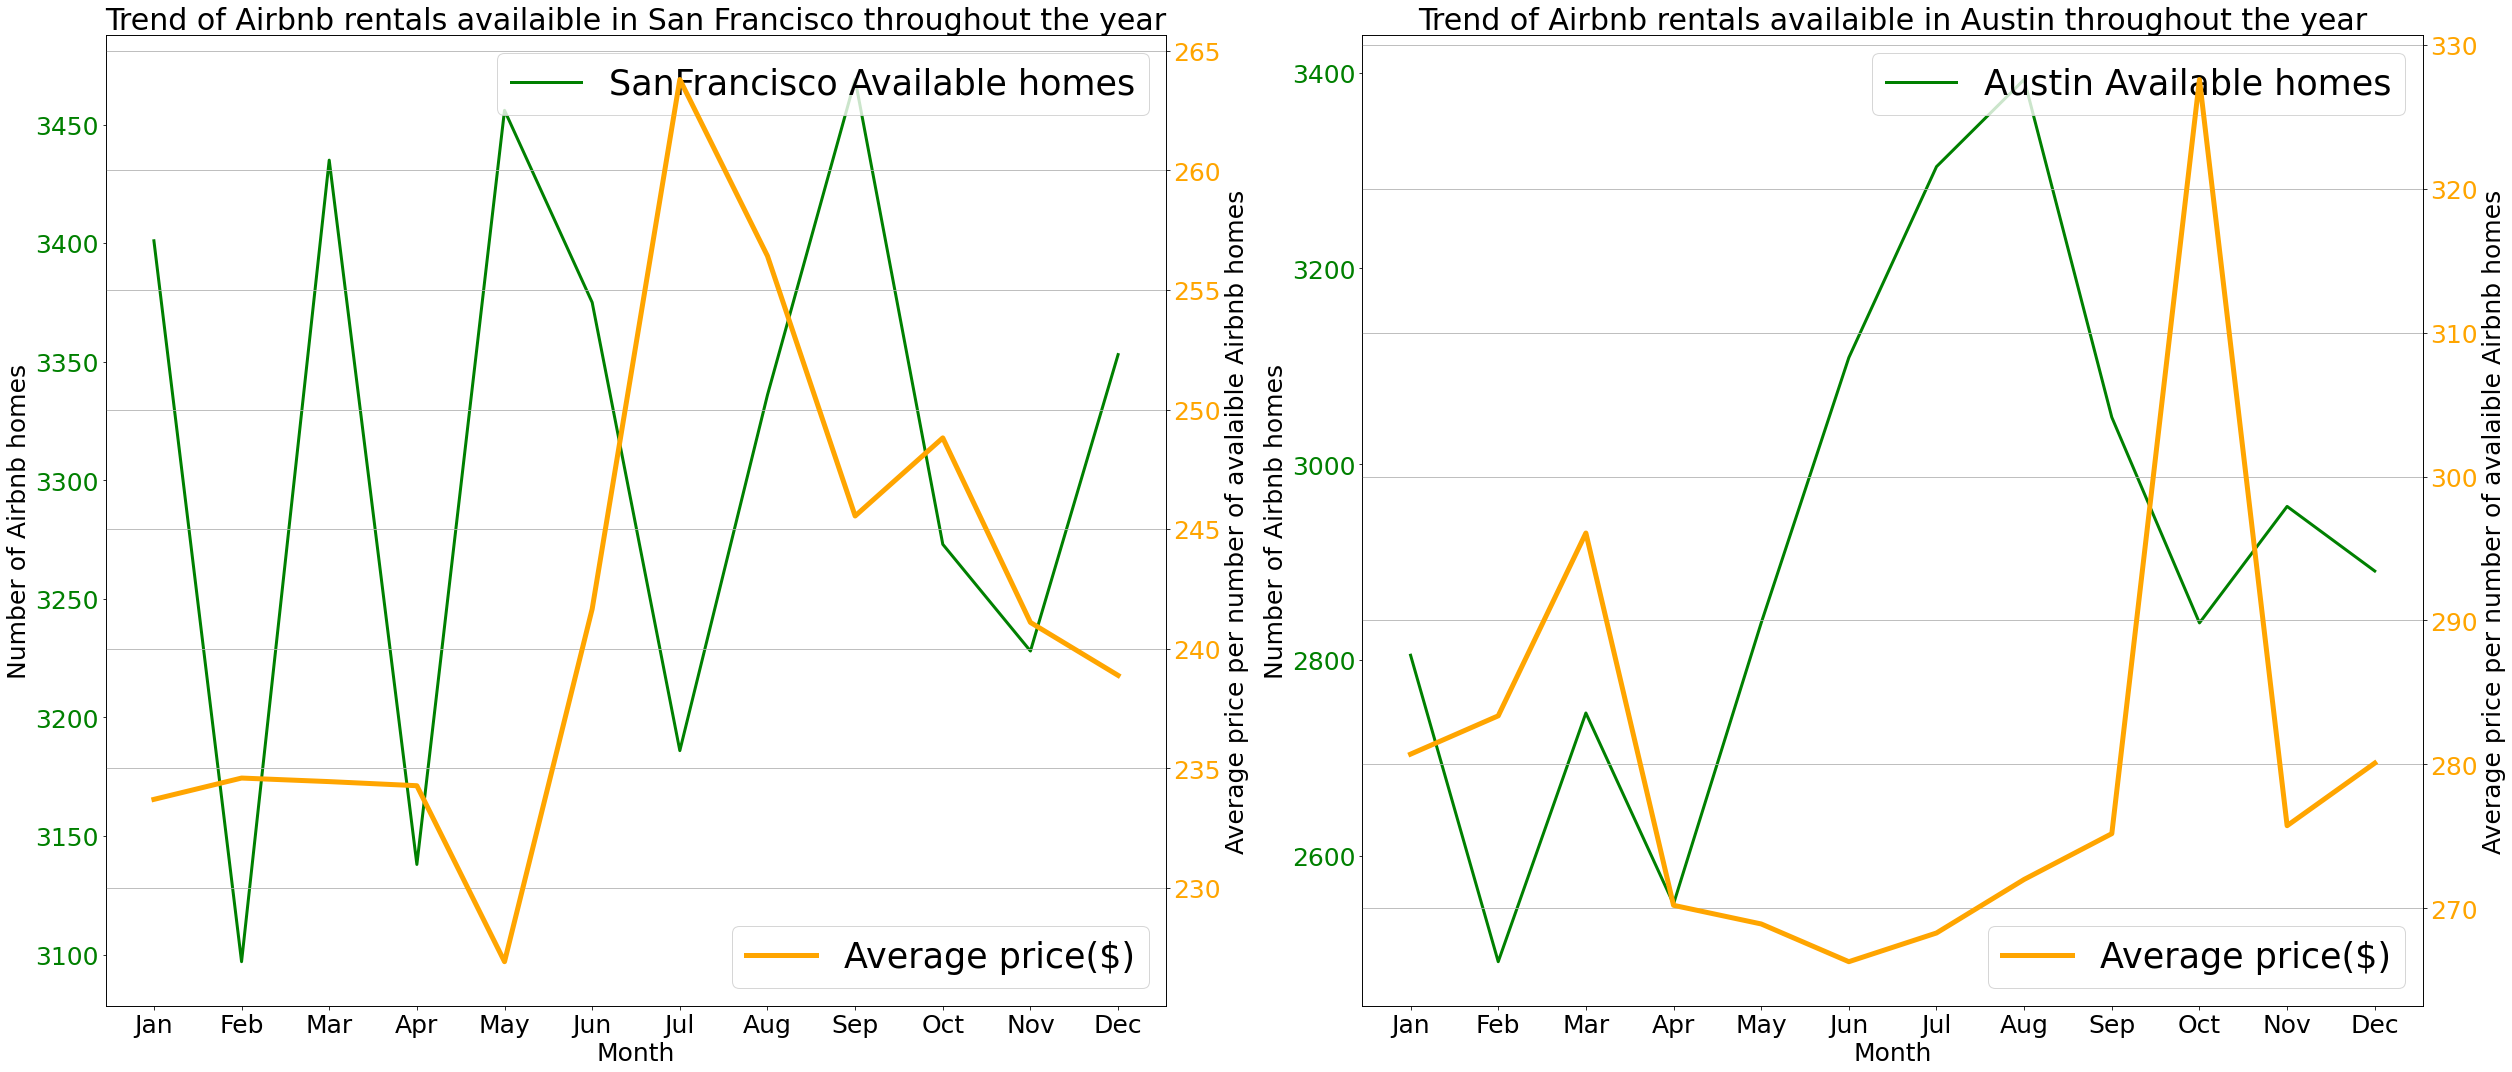

In [63]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(35,15)) 

#manipulating the first Axes 
ax[0].plot(sanfrancisco_calendar_avail_count['month'], sanfrancisco_calendar_avail_count['counts'], color='green', label= 'SanFrancisco Available homes', lw = 3) 
ax[0].legend(loc="upper right", fontsize=35)
ax[0].set_xlabel('Month', fontsize = 25) 
ax[0].set_ylabel('Number of Airbnb homes', fontsize = 25) 
ax[0].set_title('Trend of Airbnb rentals availaible in San Francisco throughout the year', fontsize = 30)
ax[0].tick_params(axis='y', labelcolor='green', labelsize = 25)
ax[0].tick_params(axis='x', labelsize = 25)

ax1 = ax[0].twinx()

ax1.plot(sanfrancisco_calendar_avail_count['month'], sanfrancisco_calendar_avail_mean['average_price'], color='orange', lw = 5, label='Average price($)') 
ax1.legend(loc="lower right", fontsize=35)
ax1.set_xlabel('Month', fontsize = 25) 
ax1.set_ylabel('Average price per number of avalaible Airbnb homes', fontsize = 25) 
ax1.tick_params(axis='y', labelcolor='orange', labelsize = 25)
ax1.tick_params(axis='x', labelsize = 25)
ax1.grid()

#manipulating the second Axes 
ax[1].plot(austin_calendar_avail_count['month'], austin_calendar_avail_count['counts'], color='green', label= 'Austin Available homes', lw = 3)
ax[1].legend(loc="upper right", fontsize=35)
ax[1].set_xlabel('Month', fontsize = 25) 
ax[1].set_ylabel('Number of Airbnb homes', fontsize = 25) 
ax[1].set_title('Trend of Airbnb rentals availaible in Austin throughout the year', fontsize = 30) 
ax[1].tick_params(axis='y', labelcolor='green', labelsize = 25)
ax[1].tick_params(axis='x', labelsize = 25)

ax2 = ax[1].twinx()

ax2.plot(austin_calendar_avail_count['month'], austin_calendar_avail_mean['average_price'], color='orange', label='Average price($)', lw = 5) 
ax2.legend(loc="lower right", fontsize=35)
ax2.set_xlabel('Month', fontsize = 25) 
ax2.set_ylabel('Average price per number of avalaible Airbnb homes', fontsize = 25) 
ax2.tick_params(axis='y', labelcolor='orange', labelsize = 25)
ax2.tick_params(axis='x', labelsize = 25)
ax2.grid()

plt.savefig('./plots/available_homes_price_trend.png', dpi = 70, bbox_inches='tight')
fig.tight_layout()
plt.show();

<p> Insights drawn from this plot includes: </p>
<ul>
    <li>The number of available Airbnb homes in San Francisco in the year 2020 is greater than the number of available homes in Austin</li> 
    <li>The average price of rentals in Austin is greater than the average price of rentals in San Francisco  </li>
    <li>The plot shows San Francisco Airbnb homes is highly available in January than Austin homes. 
    Both cities experience drop in availablity in February. Between February and March the two cities had an increase in available homes. However, between April and August Austin has a drastic increase in avalaibility while San Francisco's number of available homes fluctuates within that period. Between August and October Austin avaialable homes fall while that of San Francisco is in it's highest peak ever. October to November San Francisco's homes availability drops which gained another rise between November and December but Austin's availability fall instead</li>
   <li> Steady low average price is maintained between January and April by San Francisco homes when compared to Austin  available homes. Between May and July there is a huge increase in prices of available homes in San Francisco while Austin homes maintained a the usual price which is equivalent to the San Francisco price at that time. Between September and October Austin homes has a sporadic hike in price which drops back to normal in November. In December, Austin available homes picks up an increase in price while San Franciso available home price drops instead.</li>
  <b><li> Deduction one:  San Francisco Airbnb homes have better chances of availability all through the year. Austin available homes drops in December but San Francisco available homes increases instead </li></b>
    <b><li>Deduction two: Austin available home prices has a higher frequency of high prices through the year compared to San Francisco. In December, available home price increases in Austin while it drops in San Francisco.</li></b>    
</ul>

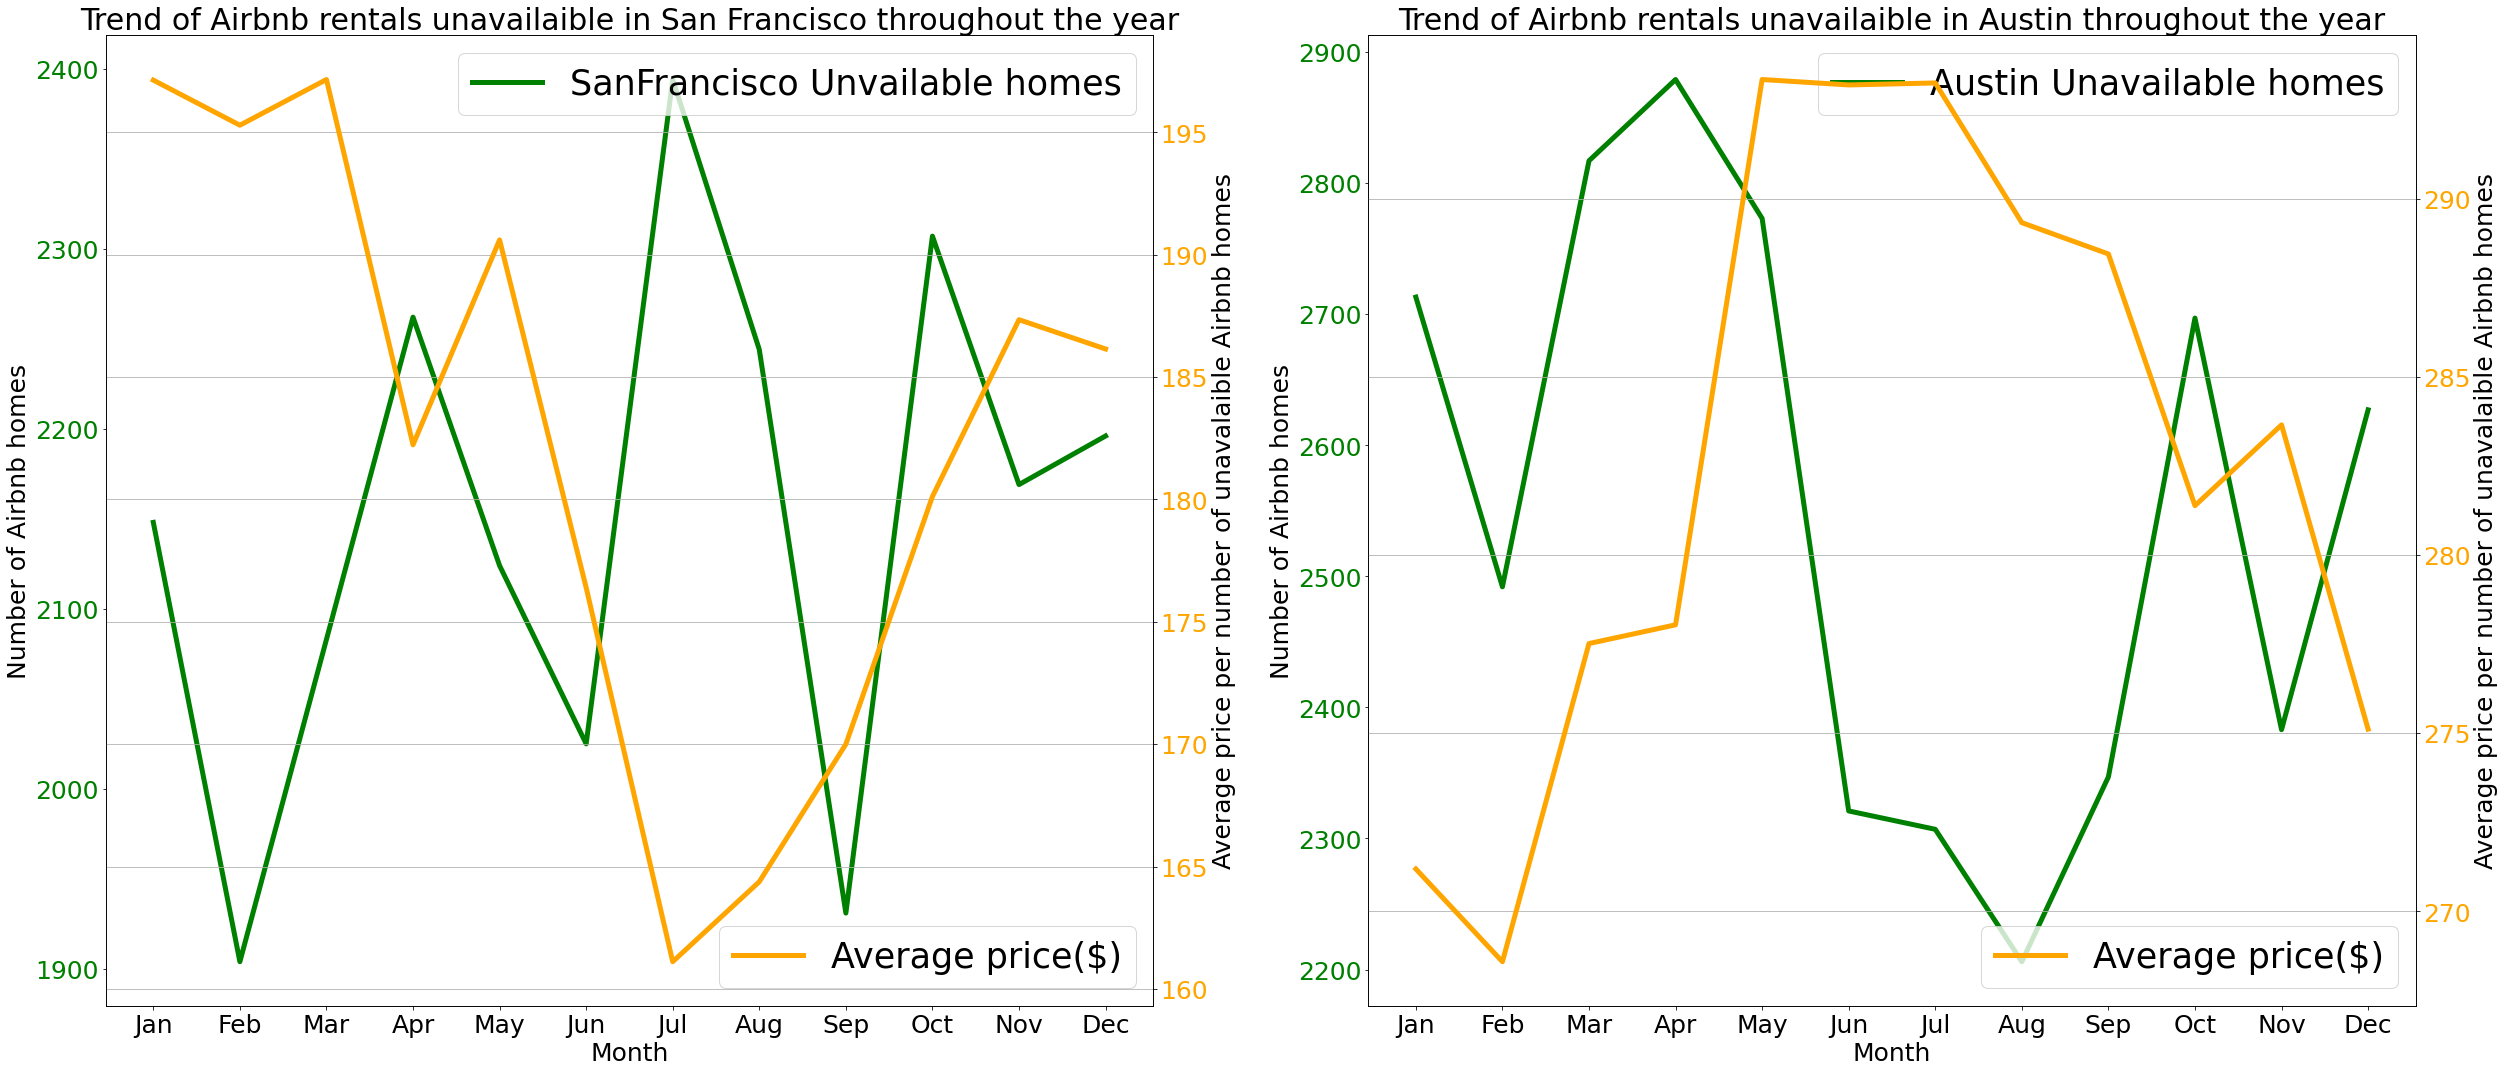

In [64]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(35,15)) 

#manipulating the first Axes 
ax[0].plot(sanfrancisco_calendar_unavail_count['month'], sanfrancisco_calendar_unavail_count['counts'], color='green', label= 'SanFrancisco Unvailable homes', lw = 5) 
ax[0].legend(loc="upper right", fontsize=35)
ax[0].set_xlabel('Month', fontsize = 25) 
ax[0].set_ylabel('Number of Airbnb homes', fontsize = 25) 
ax[0].set_title('Trend of Airbnb rentals unavailaible in San Francisco throughout the year', fontsize = 30)
ax[0].tick_params(axis='y', labelcolor='green', labelsize = 25)
ax[0].tick_params(axis='x', labelsize = 25)

ax1 = ax[0].twinx()

ax1.plot(sanfrancisco_calendar_unavail_count['month'], sanfrancisco_calendar_unavail_mean['average_price'], color='orange', lw = 5, label='Average price($)') 
ax1.legend(loc="lower right", fontsize=35)
ax1.set_xlabel('Month', fontsize = 25) 
ax1.set_ylabel('Average price per number of unavalaible Airbnb homes', fontsize = 25) 
ax1.tick_params(axis='y', labelcolor='orange', labelsize = 25)
ax1.tick_params(axis='x', labelsize = 25)
ax1.grid()

#manipulating the second Axes 
ax[1].plot(austin_calendar_unavail_count['month'], austin_calendar_unavail_count['counts'], color='green', label= 'Austin Unavailable homes', lw = 5)
ax[1].legend(loc="upper right", fontsize=35)
ax[1].set_xlabel('Month', fontsize = 25) 
ax[1].set_ylabel('Number of Airbnb homes', fontsize = 25) 
ax[1].set_title('Trend of Airbnb rentals unavailaible in Austin throughout the year', fontsize = 30) 
ax[1].tick_params(axis='y', labelcolor='green', labelsize = 25)
ax[1].tick_params(axis='x', labelsize = 25)

ax2 = ax[1].twinx()

ax2.plot(austin_calendar_avail_count['month'], austin_calendar_unavail_mean['average_price'], color='orange', label='Average price($)', lw = 5) 
ax2.legend(loc="lower right", fontsize=35)
ax2.set_xlabel('Month', fontsize = 25) 
ax2.set_ylabel('Average price per number of unavalaible Airbnb homes', fontsize = 25) 
ax2.tick_params(axis='y', labelcolor='orange', labelsize = 25)
ax2.tick_params(axis='x', labelsize = 25)
ax2.grid()

plt.savefig('./plots/unavailable_homes_price_trend.png', dpi = 70, bbox_inches='tight')
fig.tight_layout()
plt.show();

<p> Insights drawn from this plot includes: </p>
<ul>
    <li>The number of unavailable Airbnb homes in Austin in the year 2020 is greater than the number of available homes in San Francisco</li> 
    <li>The average price of rentals in Austin is greater than the average price of rentals in San Francisco </li>
    <li>The plot shows Austin Airbnb homes is highly unavailable in January than San Francisco homes. 
    Both cities experience rise in unavailablity in the month of February. Between February and April the two cities had more increase in unavailable homes. However, between April and August Austin has a drastic drop in unavalability while San Francisco's number of unavailable homes reaches its highest peak ever within that period. Between August and October Austin unavailable homes rises while that of San Francisco fluctuates. Between October and November San Francisco and Austin homes uavailability drops. However, in December, Austin homes gained a huge rise in unavailability than San Francisco homes.</li>
  <li> Between January and March San Francisco unavailable homes has a slight vary on a price which Austin meets to exceed in March. A steady high average price is maintained between April to July by Austin unavailable homes which is higher than San Francisco uavailable homes. Between August and December Austin unavailable homes prices dropped drastically and San Francisco unavailable homes prices increased instead but not to the level of Austin unavailable home prices.</li>
 <b><li> Deduction one:  San Francisco Airbnb homes have lower frequency of unavailability compared to Austin's Airbnb all through the year. Austin unavailable homes increases more in December than the San Francisco unavailable homes. </li></b>
    <b><li>Deduction two: Austin unavailable home prices has a higher frequency of high prices through the year compared to San Francisco. In December, unavailable home prices decreases more in Austin than in San Francisco but not to the average price of San Francisco at that time.</li></b>    
</ul>


In [65]:
# create a copy of Austin dataframe with selected columns 

auxtin_df = df_aux_highlights.copy()

auxtin_df


,city,state,beds,bathrooms,accommodates,guests_included,bedrooms,zipcode,neighbourhood,review_scores_rating,host_since,security_deposit,host_acceptance_rate,host_response_time,host_identity_verified,property_type,room_type,host_response_rate,host_has_profile_pic,price,instant_bookable,calculated_host_listings_count_entire_homes,cancellation_policy,calendar_updated
0,Austin,TX,2.0,2.0,4,4,2.0,78702.0,East Downtown,93.0,2008,500.000000,100.000000,within an hour,t,House,Entire home/apt,96.857665,t,$225.00,f,2,strict_14_with_grace_period,7 months ago
1,Austin,TX,2.0,1.0,2,2,1.0,78702.0,East Downtown,91.0,2008,500.000000,100.000000,within an hour,t,House,Private room,96.857665,t,$100.00,f,2,strict_14_with_grace_period,9 months ago
2,Austin,TX,2.0,1.0,3,2,1.0,78702.0,East Downtown,97.0,2009,100.000000,98.000000,within an hour,t,Guesthouse,Entire home/apt,100.000000,t,$95.00,f,1,strict_14_with_grace_period,6 days ago
3,Austin,TX,1.0,1.0,2,2,1.0,78729.0,SW Williamson Co.,98.0,2009,288.011905,92.000000,within an hour,t,House,Private room,96.857665,t,$40.00,f,0,moderate,7 weeks ago
4,Austin,TX,1.0,1.0,2,2,0.0,78704.0,Travis Heights,99.0,2009,288.011905,100.000000,within an hour,f,Guesthouse,Entire home/apt,100.000000,t,$99.00,t,1,strict_14_with_grace_period,yesterday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,Austin,TX,1.0,1.0,1,1,1.0,78704.0,South Congress,100.0,2013,288.011905,89.613164,within an hour,t,Apartment,Entire home/apt,96.857665,t,$60.00,f,5,strict_14_with_grace_period,today
11664,Austin,TX,1.0,1.0,3,1,1.0,78741.0,Parker Lane,100.0,2019,288.011905,0.000000,a few days or more,f,Apartment,Entire home/apt,0.000000,t,$40.00,t,5,strict_14_with_grace_period,today
11665,Austin,TX,1.0,1.0,3,1,1.0,78741.0,East Riverside,100.0,2019,288.011905,0.000000,a few days or more,f,Apartment,Entire home/apt,0.000000,t,$40.00,t,5,strict_14_with_grace_period,today
11666,Austin,TX,1.0,1.0,3,1,1.0,78704.0,Travis Heights,100.0,2019,288.011905,0.000000,a few days or more,f,Apartment,Entire home/apt,0.000000,t,$45.00,f,5,strict_14_with_grace_period,today


In [66]:
# create a copy of San Francisco dataframe with selected columns 

sf_df = df_sf_highlights.copy()
sf_df

,city,state,beds,bathrooms,accommodates,guests_included,bedrooms,zipcode,neighbourhood,review_scores_rating,host_since,security_deposit,host_acceptance_rate,host_response_time,host_identity_verified,property_type,room_type,host_response_rate,host_has_profile_pic,price,instant_bookable,calculated_host_listings_count_entire_homes,cancellation_policy,calendar_updated
0,San Francisco,CA,2.0,1.0,3,2,1.0,94117,Lower Haight,97.0,2008,100.000000,98.000000,within an hour,t,Apartment,Entire home/apt,90.000000,t,$170.00,t,1,moderate,3 weeks ago
1,San Francisco,CA,3.0,1.0,5,2,2.0,94110,Bernal Heights,98.0,2009,458.276754,81.000000,within a day,t,Apartment,Entire home/apt,100.000000,t,$235.00,f,1,strict_14_with_grace_period,2 weeks ago
2,San Francisco,CA,1.0,4.0,2,1,1.0,94117,Cole Valley,84.0,2009,200.000000,86.000000,within an hour,t,Apartment,Private room,100.000000,t,$65.00,f,0,strict_14_with_grace_period,5 months ago
3,San Francisco,CA,1.0,4.0,2,1,1.0,94117,Cole Valley,93.0,2009,200.000000,86.000000,within an hour,t,Apartment,Private room,100.000000,t,$65.00,f,0,strict_14_with_grace_period,9 months ago
4,San Francisco,CA,2.0,1.5,4,2,2.0,94117,Western Addition/NOPA,97.0,2009,0.000000,43.000000,within a few hours,t,Condominium,Entire home/apt,100.000000,t,$703.00,f,2,moderate,4 months ago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,San Francisco,CA,2.0,1.0,3,1,0.0,94117,Hayes Valley,100.0,2014,500.000000,87.825007,within an hour,t,Apartment,Entire home/apt,95.501214,t,$112.00,t,1,flexible,yesterday
8134,San Francisco,CA,10.0,3.5,10,1,4.0,94116,Parkside,100.0,2013,5000.000000,100.000000,within a few hours,f,House,Entire home/apt,100.000000,t,$269.00,t,1,flexible,4 days ago
8135,San Francisco,CA,4.0,2.5,6,1,3.0,94103,Mission District,100.0,2014,500.000000,0.000000,within a few hours,t,House,Entire home/apt,100.000000,t,$375.00,f,2,flexible,2 days ago
8136,San Francisco,CA,1.0,1.0,2,1,1.0,94109,SoMa,100.0,2014,200.000000,87.825007,within an hour,f,Apartment,Private room,95.501214,t,$86.00,t,0,flexible,yesterday


<h2>Do I stand the chance to incure more cost on the request for additional services?</h2>

In [67]:
def visualize_corelation(df, df_2, col_x, base, x_label, y_label):
    '''
    Function to visualize the popularity of each cancellation policy 
    
    Args:
        df: first Dataframe
        df_2: second Dataframe
        col_x: string, column
        base: int, column
        x_label: string, title of x axis
        y_label: string, title of y axis
    Returns:
        plot: a correlation plot
    '''

    fig = plt.subplots(ncols=2, sharey=True, figsize=(35,15))
    
    ax = plt.subplot(1,2,1)
    ax1 = sns.scatterplot(x=df[col_x], y=df[base], ax=ax, color = 'g',  marker = 'o', s=430);
    ax1.set_xlabel(x_label,size=30)
    ax1.set_ylabel(y_label,size=30)
    ax1.set_title('Correlation between {} and {}'.format(x_label, y_label),size=30)
    h, _ = ax.get_legend_handles_labels()
    ax1.legend(handles=h, loc="upper right", title="Austin", title_fontsize=35)
    ax1.tick_params(axis='x', labelsize = 25)
    ax1.tick_params(axis='y', labelsize = 25)

    
    ax = plt.subplot(1,2,2)
    ax2 = sns.scatterplot(x=df_2[col_x], y=df_2[base],ax=ax, color = 'm',  marker = 'o', s=430);
    ax2.set_ylabel(y_label,size=30)
    ax2.set_xlabel(x_label,size=30)
    h, _ = ax.get_legend_handles_labels()
    ax2.legend(handles=h, loc="upper right", title="SanFranciso", title_fontsize=35)
    ax2.tick_params(axis='x', labelsize = 25)
    ax2.tick_params(axis='y', labelsize = 25)
    ax2.set_title('Correlation between {} and {}'.format(x_label, y_label),size=30)
    plt.show()

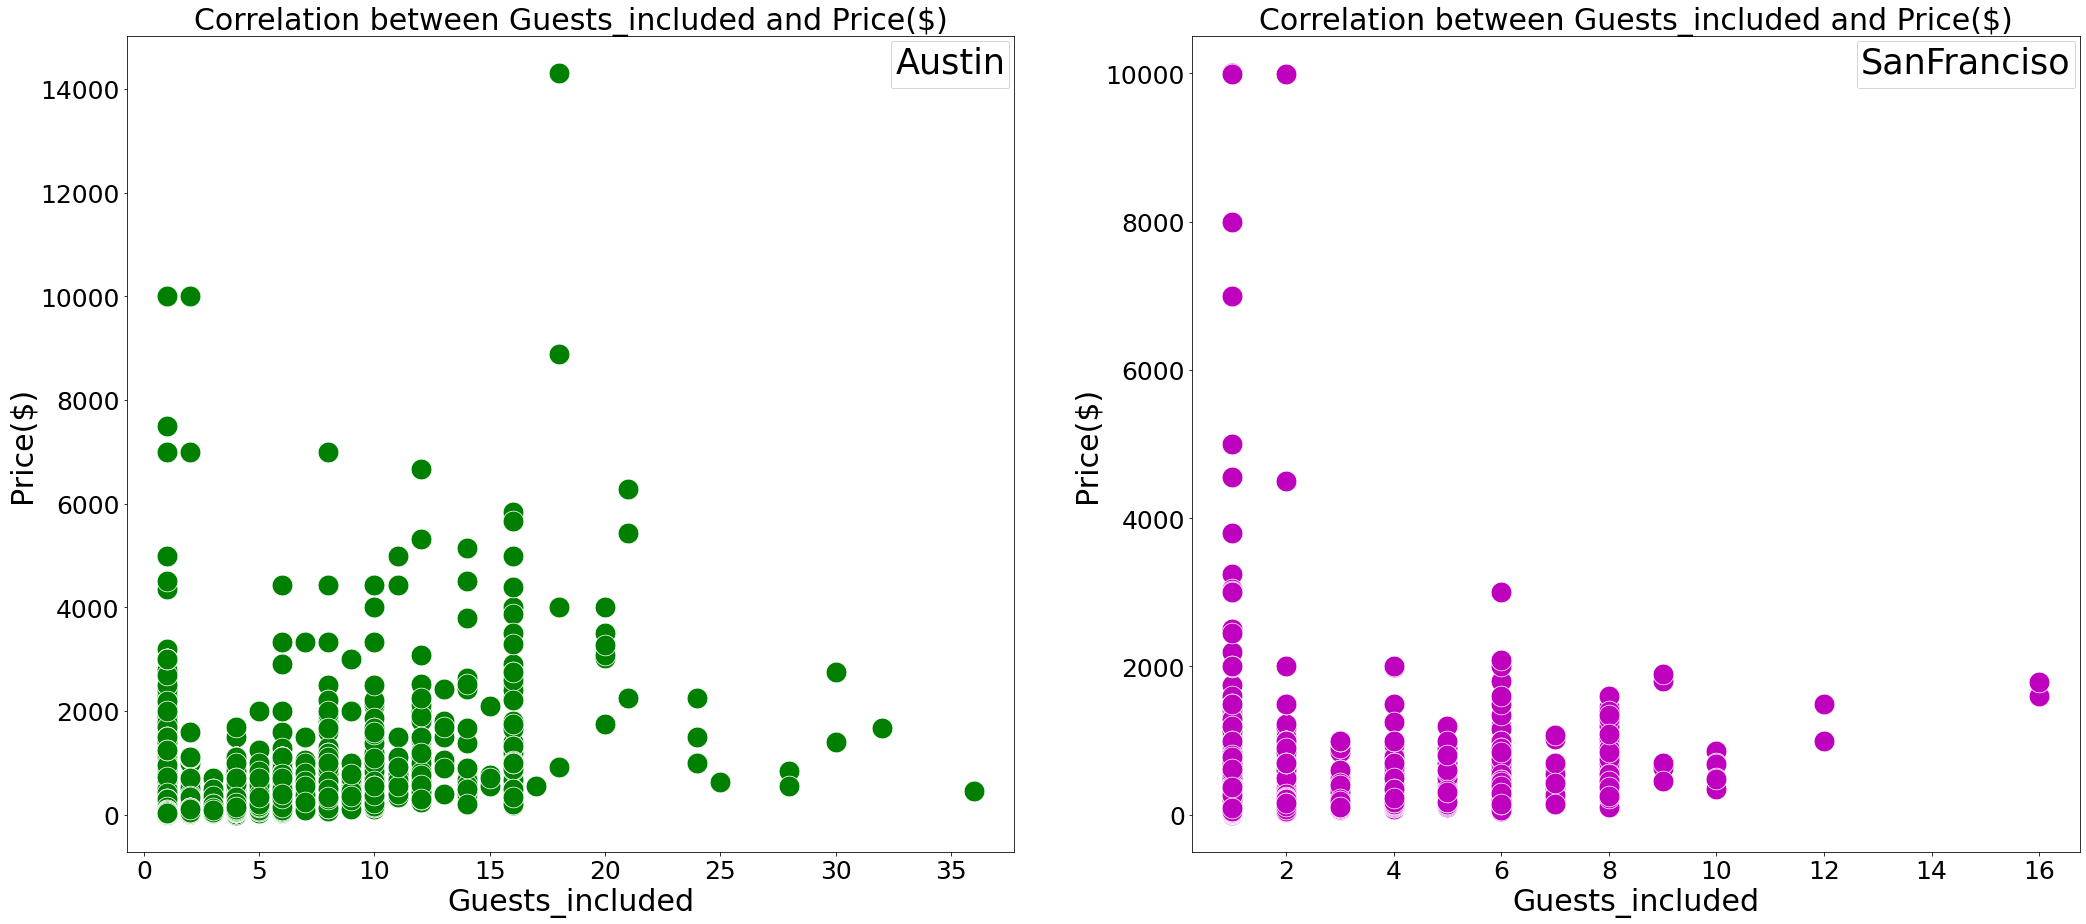

In [68]:
# convert price and visualize correlation between Guests included and Price(Austin vs SF)
auxtin_listings = change_price_format(auxtin_df, 'price')
sf_listings = change_price_format(sf_df, 'price')
visualize_corelation(auxtin_listings, sf_listings, 'guests_included', 'price', 'Guests_included', 'Price($)')


<b><p>There is a moderately positive linear relationship between the number of Guests included and the price in Austin and San Francisco with some outliers.
This indicates that the number of added guests does not always imply an increase in the price of accommodation but its an important factor in price. </p></b>

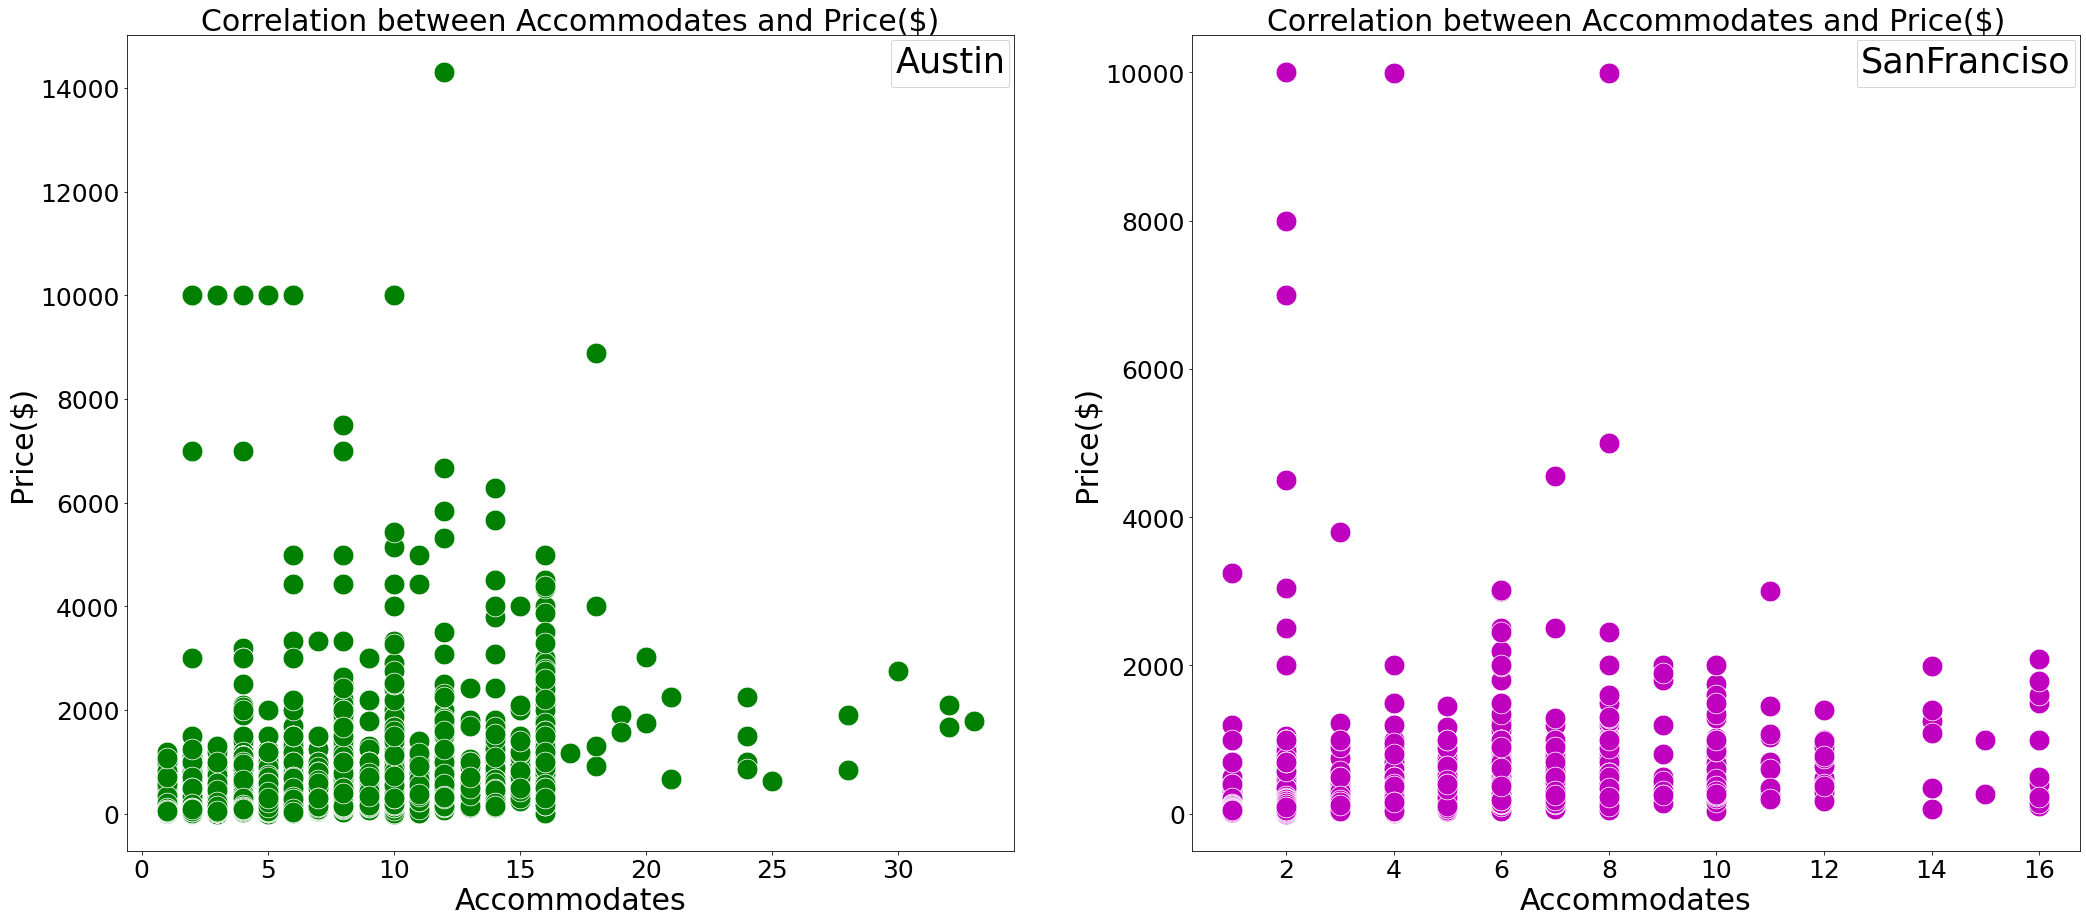

In [69]:
# visualize correlation between Accommodates and Price(Austin vs SF)

visualize_corelation(auxtin_listings, sf_listings, 'accommodates', 'price', 'Accommodates', 'Price($)')



<b><p>There is a moderately positive linear relationship between the accommodates and price in Austin and San Francisco with some outliers.
This indicates that the number of tenants does not always imply an increase in the price of accommodation but can be a determinant factor in price. </p></b>

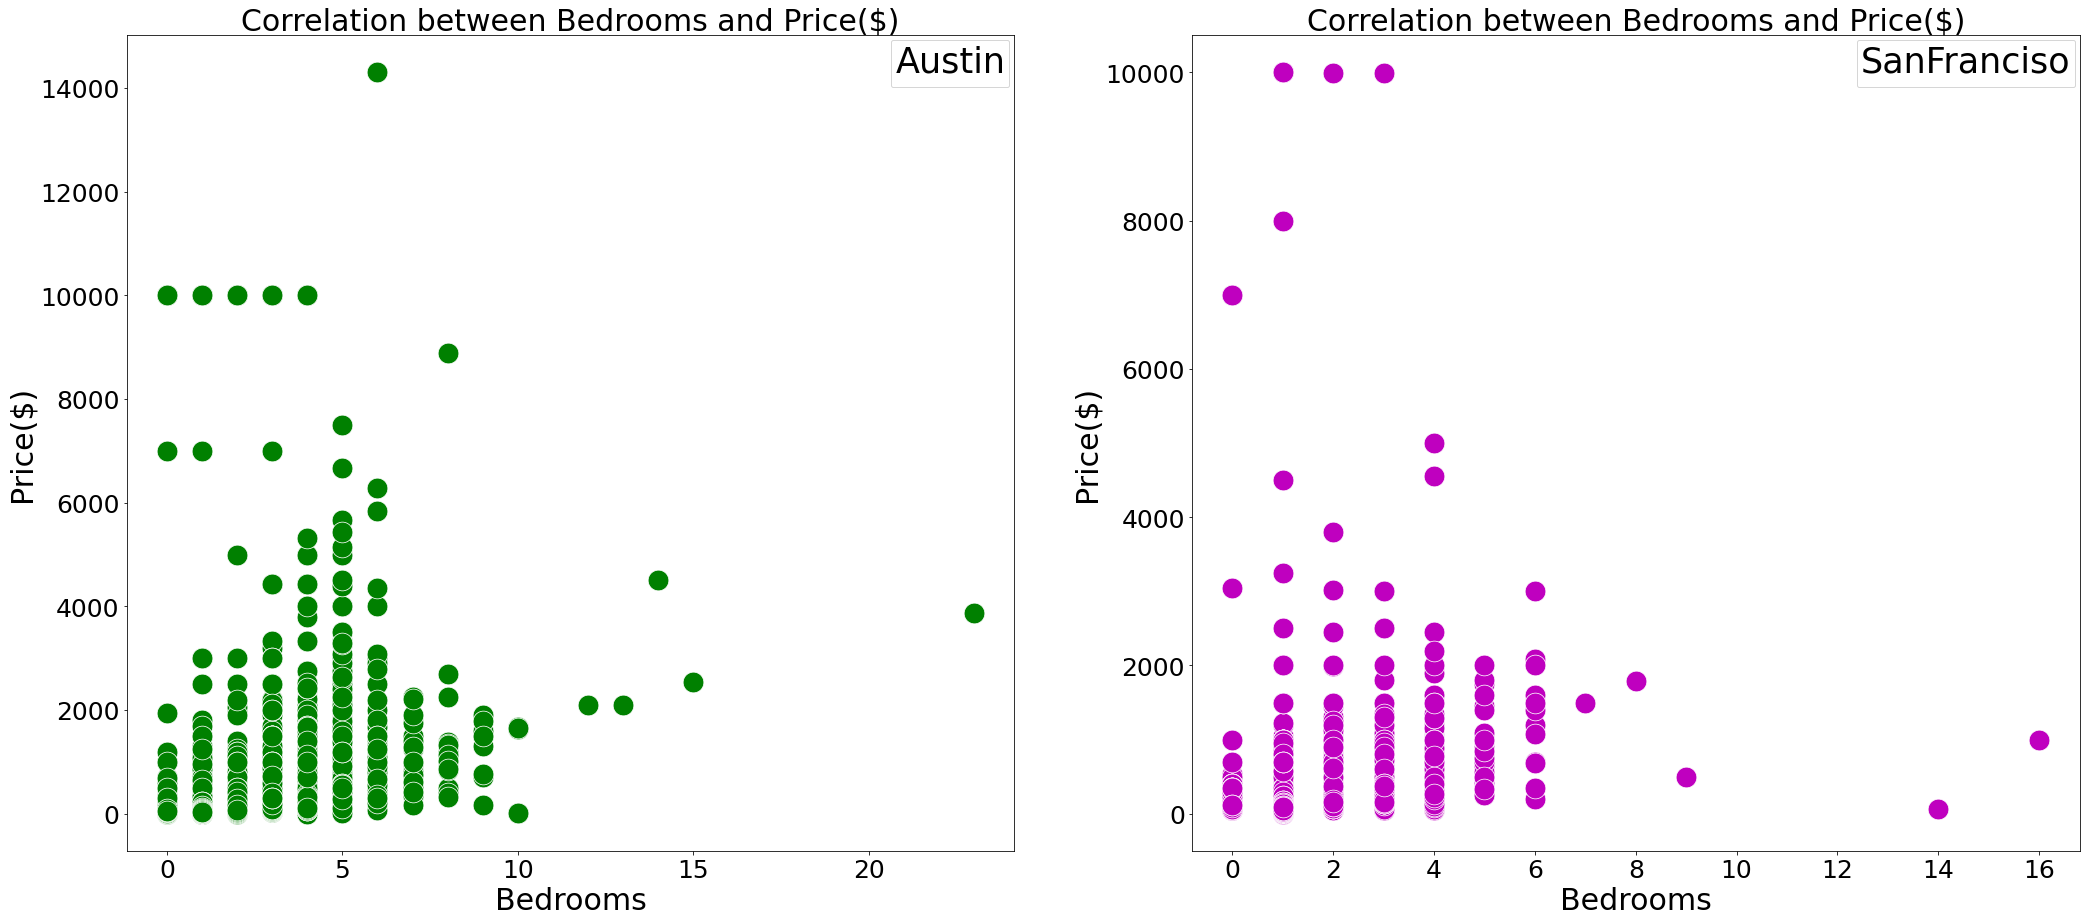

In [70]:
# visualize correlation between bedrooms and Price(Austin vs SF)

visualize_corelation(auxtin_listings, sf_listings, 'bedrooms', 'price', 'Bedrooms', 'Price($)')

<h2>Where will I obtain better services for a price of 200 dollars: SF or Austin?</h2>

<b><p>Assuming a potential Airbnb customer who is willing to secure accommodation can only afford 200dollar per night and he/she intends to have a glance of what type of property is popular with that price range and what type of property that price can actually get him/her </p></b>


<b><p>The plot categorizes what part of the graph the customer should look for to extract information needed. Here is how to deduce information from the graph:</p></b>

<b><ul><li>Green colored bars indicates the percentage of the property types with prices below what the customer can afford.</li> 
    <li>Red colored bars indicates the percentage of the property types with prices above what the customer can afford.</li>
    <li>Property types without bars indicates that there are no properties within that price range available</li>
    </ul></b>
    
 <b>Note: This process was applied to room type, cancellation policy and neighborhood versus price</b>


In [71]:
def visualize(df, col_x, base, threshold,  city, set_title=True):
    '''
    Function to visualize the difference in proportion of a categorical feature based on a numeric feature in the dataset
    
    The base numeric feature is categorized into two categories using a threshold simulating an input.
    Barplot are used for visualizing the distribution of the numeric over the categorical features
     
    Args:
        df: a Dataframe
        col_x: a string, the name of the column to visualize the distribution
        base: a string, the name of the column to categorize
        threshold: a float, the threshold to categorize the base feature
        x_label: a string, name to show on the x-axis, if None, use col_x
        base_name: a string, name to show in the legend, if None, use base
        set_title: a boolean, if include the title
        
    Returns:
        None
    '''
        
    fig, ax = plt.subplots(figsize=(20, 10))
    
    x_label = col_x
    base_name = base
    
    # Create two dataframes t store the classified data and then combine with a label added for each entry
    high_df = df.loc[df[base] > threshold, col_x].value_counts(normalize=True).mul(100).reset_index(name='proportion')
    high_df['pop'] = 'T'
    low_df = df.loc[df[base] <= threshold, col_x].value_counts(normalize=True).mul(100).reset_index(name='proportion')
    low_df['pop'] = 'F'
    comb_df = pd.concat([high_df, low_df], ignore_index=True)
    ax = sns.barplot(x='index', y='proportion', hue='pop', data=comb_df, palette={'T':'red',
                                                                                 'F':'green'})
    ax.set_ylabel('Proportion', fontsize = 16)
    ax.tick_params(axis='x', labelsize = 12, labelrotation = -90)
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, ['high_'+base_name, 'low_'+base_name], loc=0, fontsize = 15)
    
    if set_title == True:
        ax.set_title('Comparison of {} for low and high {} in {}'.
                     format(x_label, base_name, city), fontsize = 16)
        
    ax.set_xlabel(x_label, fontsize = 16)
    ax.tick_params(axis='y', labelsize = 15)
    
  
    
    plt.savefig('./plots/compare_%s_on_%s.png' % (x_label, base_name), dpi = 300, bbox_inches='tight')
    plt.show()

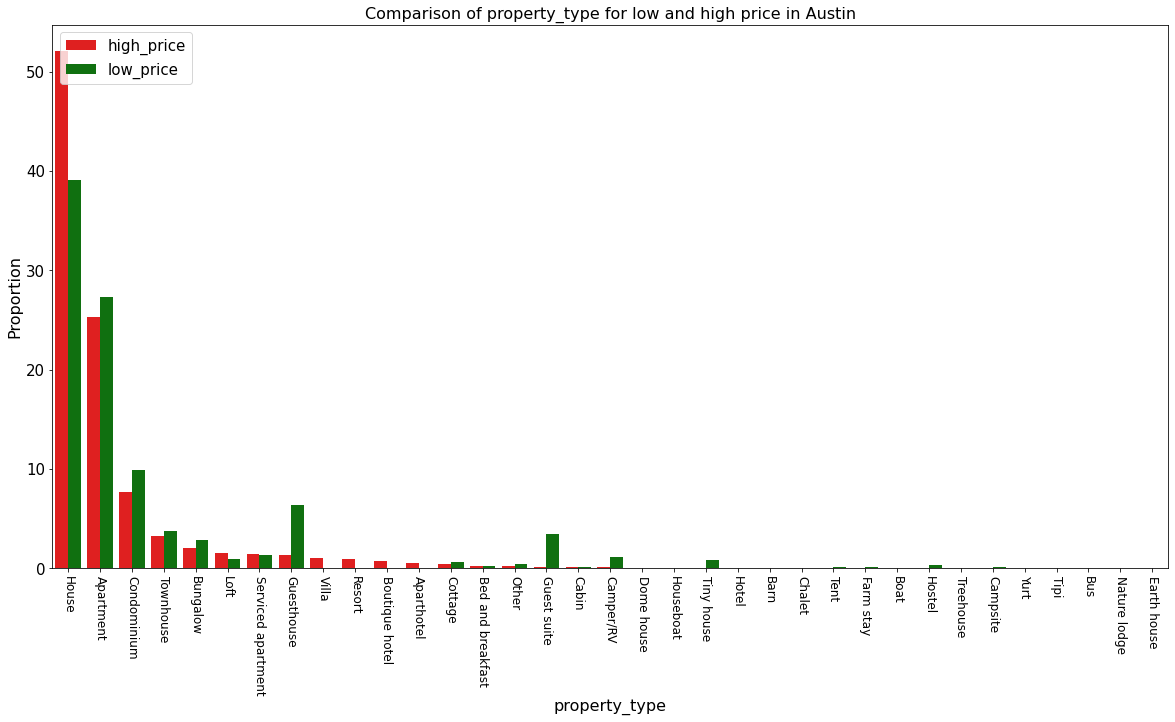

In [72]:
# visualize comparison between property type with Price for Austin

visualize(auxtin_listings,  'property_type', 'price', 200, 'Austin')

<b><p>Houses take a greater share of the property types available for 200 dollar in Austin </p></b>

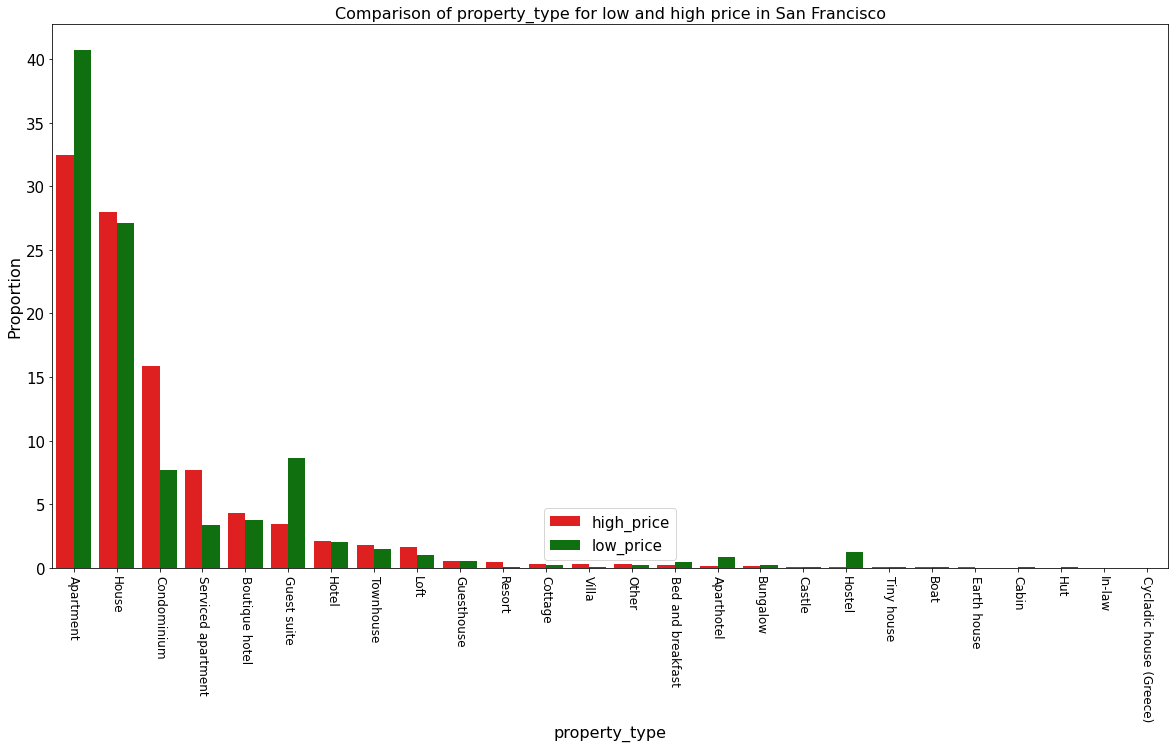

In [73]:
# visualize comparison between property type with Price for San Francisco

visualize(sf_listings,  'property_type', 'price', 200, 'San Francisco')

<b><p>Apartments takes a greater share of the property types available for 200 dollar in San Francisco instead </p></b>

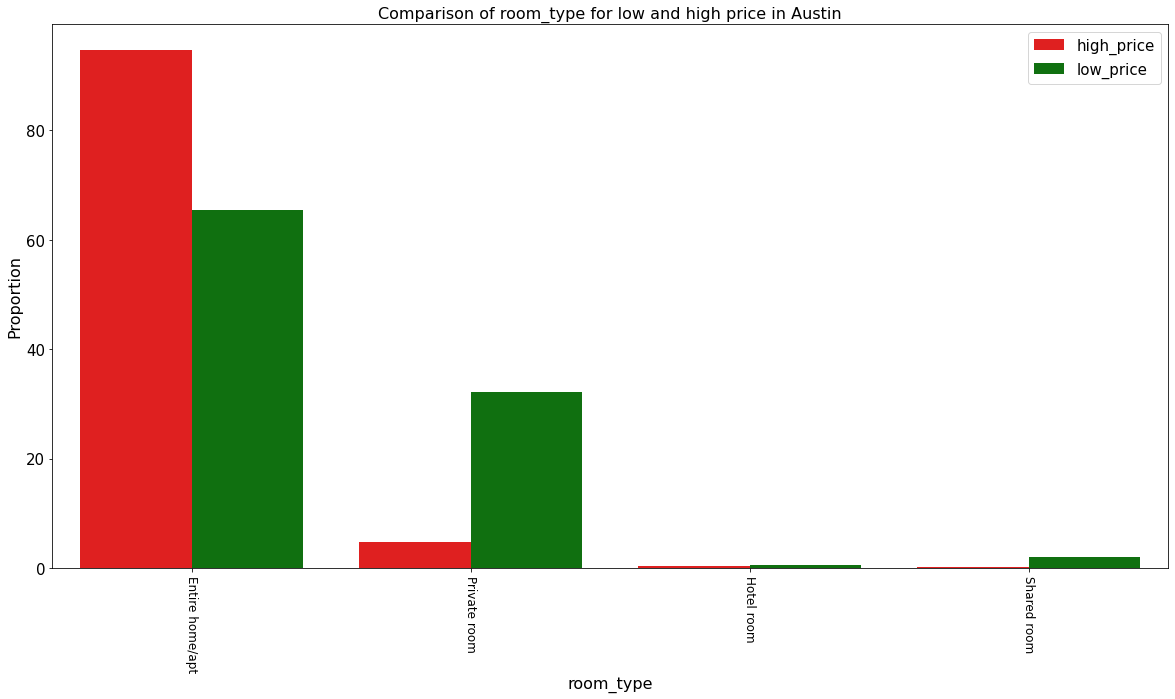

In [74]:
# visualize comparison between room type with Price for Austin

visualize(auxtin_listings,  'room_type', 'price', 200, 'Austin')

<b><p>Entire home or apartment takes a greater share of the room types that are available for 200 dollar in Austin </p></b>

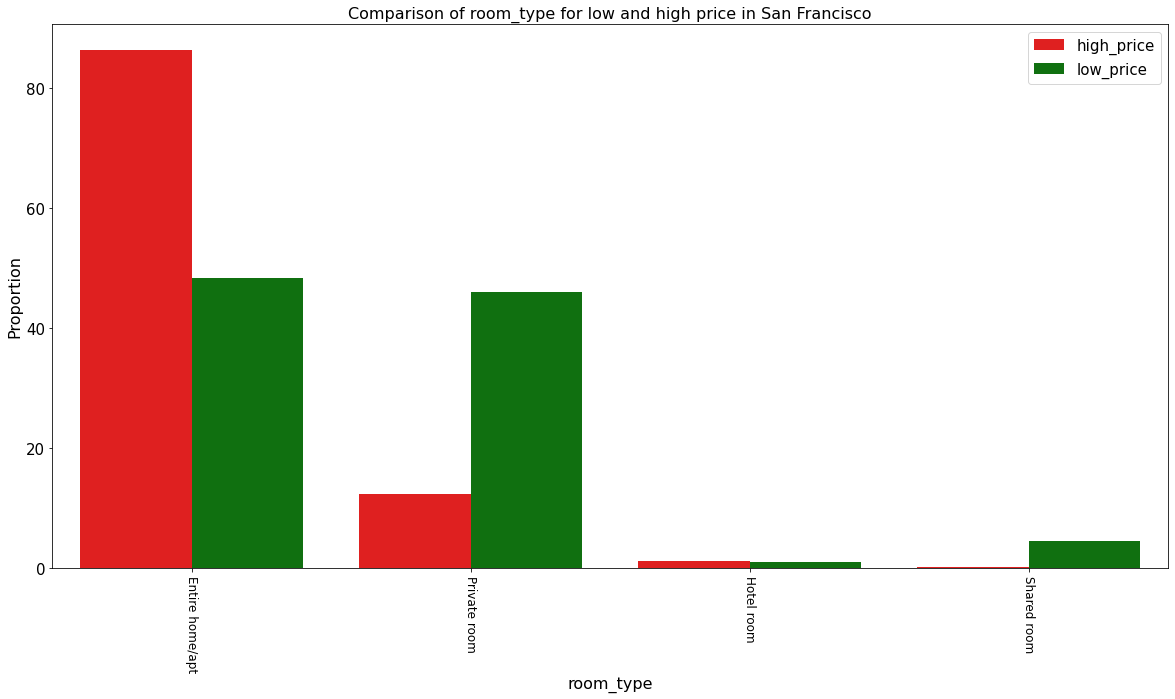

In [75]:
# visualize comparison between room type with Price for San Francisco

visualize(sf_listings,  'room_type', 'price', 200, 'San Francisco')

<b><p>Entire home/apartment takes a greater share of the room types that are available for 200 dollar in San Francisco </p></b>

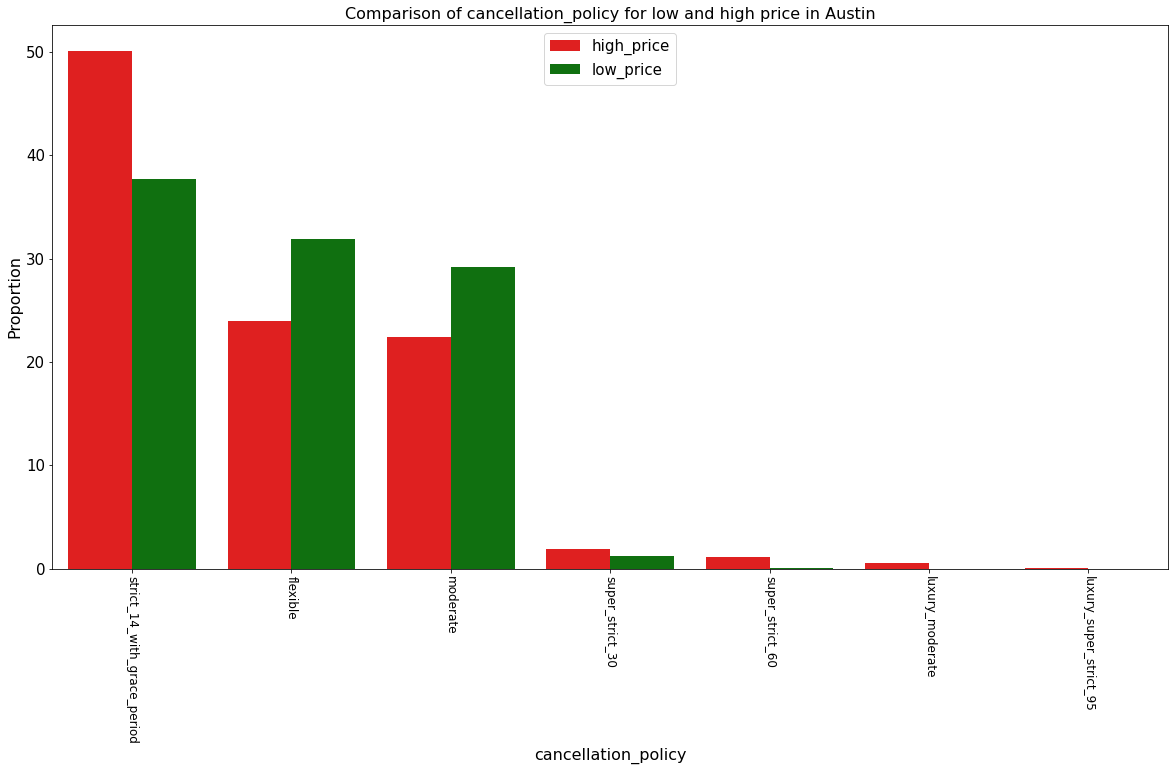

In [76]:
# visualize comparison between cancellation policy with Price for Austin

visualize(auxtin_listings,  'cancellation_policy', 'price', 200, 'Austin')

<b><p>Strict with 14 days grace period cancellation policy takes a greater share of the cancellation policies available for 200 dollar in Austin </p></b>

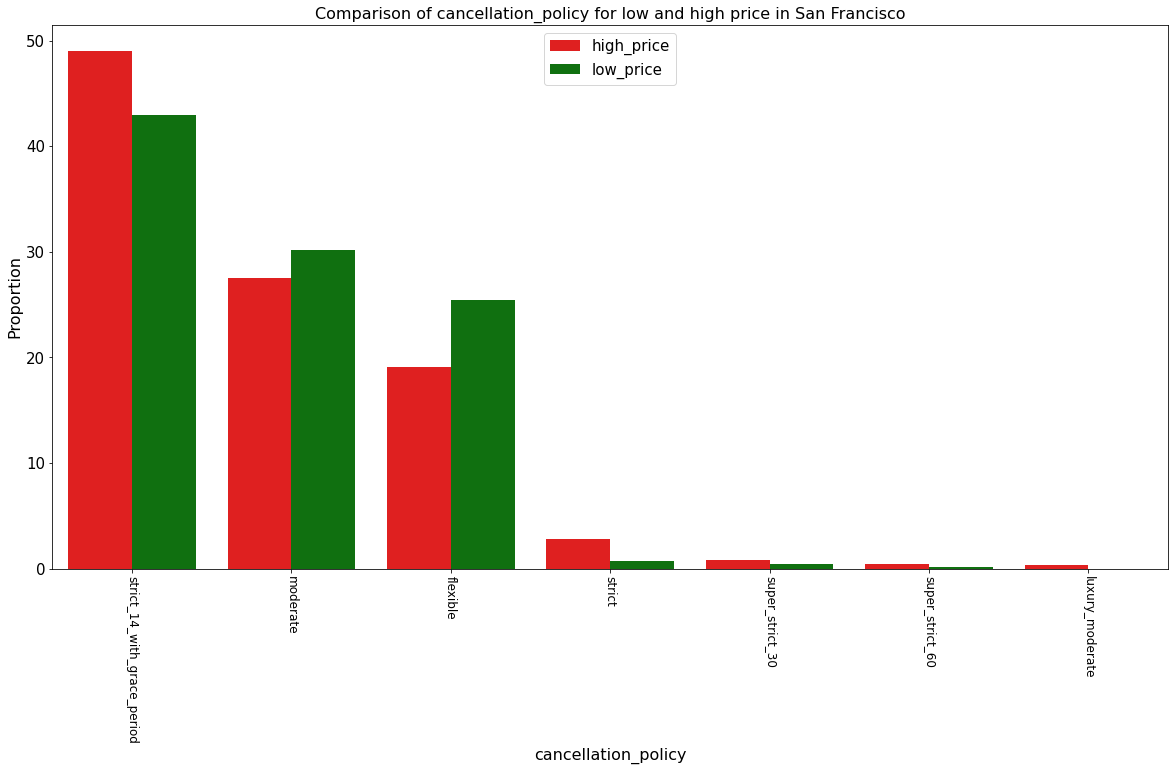

In [77]:
# visualize comparison between cancellation policy with Price for San Francisco

visualize(sf_listings,  'cancellation_policy', 'price', 200, 'San Francisco')

<b><p>Strict with 14 days grace period cancellation policy takes a greater share of the cancellation policies available for 200 dollar in San Francisco </p></b>

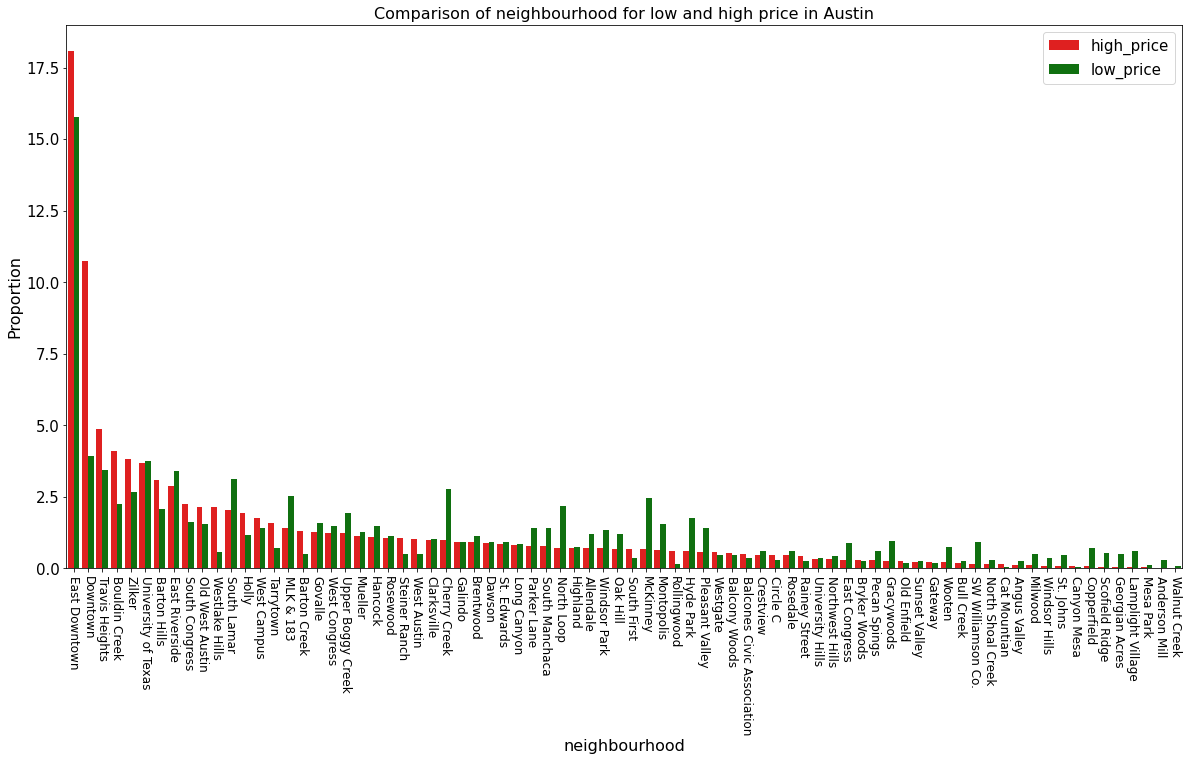

In [78]:
# visualize comparison between cancellation policy with Price for Austin

visualize(auxtin_listings,  'neighbourhood', 'price', 200, 'Austin')

<b><p>East downtown takes a greater share of the neighborhood available for 200 dollar in Austin </p></b>

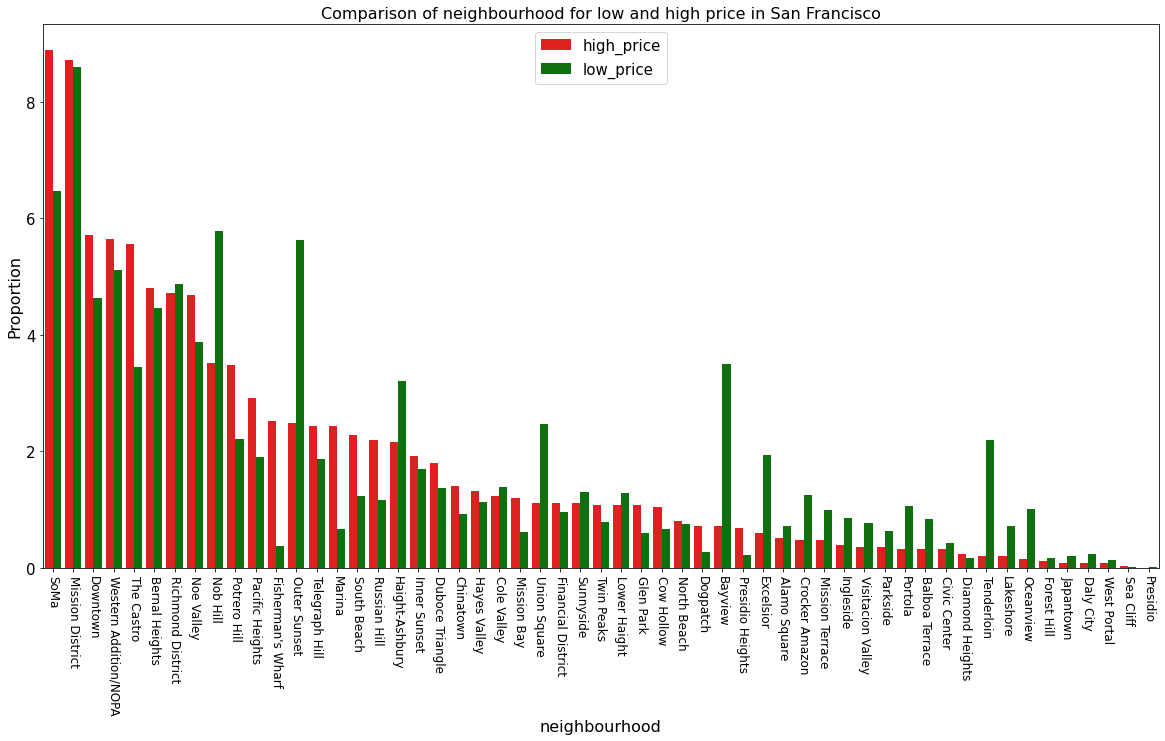

In [79]:
# visualize comparison between neighborhood with Price for San Francisco

visualize(sf_listings,  'neighbourhood', 'price', 200, 'San Francisco')

<b><p>Soma takes a greater share of the neighborhood available for 200 dollar in Austin </p></b>

<h2>In the situation whereby my plans changed, which of the cities is more lenient with cancellation policy?</h2>

In [80]:
def visualize_cancellation_policy(df, col_x, col_y, title):
    '''
    Function to visualize the popularity of each cancellation policy 
    
    Args:
        df: a Dataframe
        col_x: string, cancellation policies column
        col_y: string, property type column
        title: string, title of the pie chart
    Returns:
        Dataframe: a sorted dataframe of cities with the count of its availability per month
    '''

    df = df.groupby([col_x, col_y]).size().groupby(level=0).max().sort_values(ascending=False).reset_index(name='max_count')
    df['%count'] = df['max_count']/sum(df['max_count'])
   
    df.drop(df.tail(2).index,inplace=True)
    ax = df['%count'].plot(kind='pie', labels=df[col_x], autopct='%1.1f%%', figsize=(13, 13))
    ax.set_ylabel('')
    ax.set_title(title)
    explode = (0, 0.1, 0, 0)
    mpl.rcParams['font.size'] = 18.0
    
    return df

,cancellation_policy,max_count,%count
0,strict_14_with_grace_period,2210,0.431220
1,flexible,1433,0.279610
2,moderate,1309,0.255415
3,super_strict_30,112,0.021854
4,super_strict_60,39,0.007610


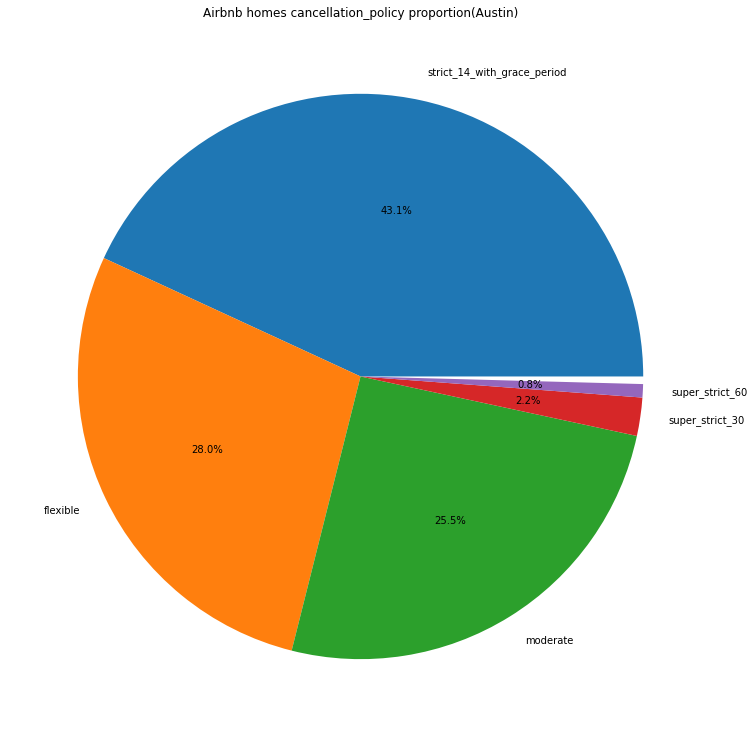

In [81]:
# visualize the popularity of each cancellation policy Austin

visualize_cancellation_policy(auxtin_listings, 'cancellation_policy', 'property_type', 'Airbnb homes cancellation_policy proportion(Austin)')

<b><p>Strict with 14 days grace period is the most popular cancellation policy in Austin Airbnb homes while strict without grace period is the least popular </p></b>

,cancellation_policy,max_count,%count
0,strict_14_with_grace_period,1525,0.456997
1,flexible,867,0.259814
2,moderate,811,0.243033
3,strict,108,0.032364
4,super_strict_30,15,0.004495


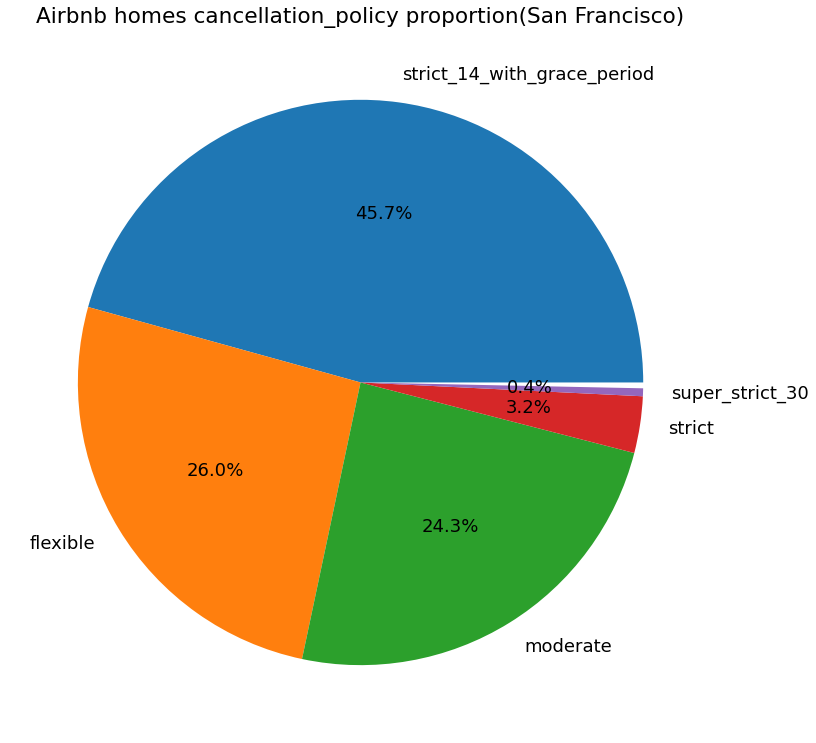

In [82]:
# visualize the popularity of each cancellation policy San Francisco

visualize_cancellation_policy(sf_listings, 'cancellation_policy', 'property_type', 'Airbnb homes cancellation_policy proportion(San Francisco)')

<b><p>Strict with 14 days grace period is the most popular cancellation policy in San Francisco Airbnb homes while super strict with 60 days grace period is the least popular cancellation policy</p></b>

In [83]:
# Group room type by count

popular_rooms_df =  auxtin_listings[['room_type', 'city']].groupby('room_type').count().rename(columns={'city':'city_count'}).reset_index()

popular_rooms_df['%count'] = popular_rooms_df['city_count']/sum(popular_rooms_df['city_count']) * 100
popular_rooms_df

,room_type,city_count,%count
0,Entire home/apt,8847,75.835762
1,Hotel room,51,0.437168
2,Private room,2609,22.364135
3,Shared room,159,1.362935


<h2>What is the popularity of room types in San Francisco versus Austin?</h2>

In [84]:
def visualize_popular_room_types(df, col_x, col_y, city):
    '''
    Function to visualize the popularity of room types
    
    Args:
        df: a Dataframe
        col_x: integer, percentage count column
        col_y: string, room type column
        city: string, city name
    Returns:
        Dataframe: a sorted dataframe of cities with the count of its availability per month
    '''
    df =  df[['room_type', 'city']].groupby('room_type').count().rename(columns={'city':'city_count'}).reset_index()
    df['%count'] = popular_rooms_df['city_count']/sum(popular_rooms_df['city_count']) * 100
    ax = sns.barplot(data=popular_rooms_df, x=col_x, y=col_y, ci=None)
    ax.set(xlabel='city counts', ylabel='city')
    ax.set_title('{} Airbnb room types'.format(city))
    plt.rcParams['figure.figsize']=(8,8)

    plt.show()


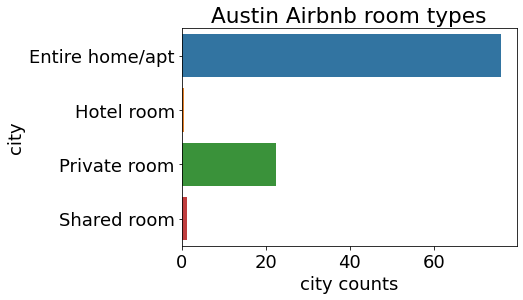

In [85]:
# visualize the popularity of room types Austin

visualize_popular_room_types(auxtin_listings, '%count', 'room_type', 'Austin')

<b><p>Entire home is the most popular room type in Austin with above 60% while Hotel room is the least popular</p></b>

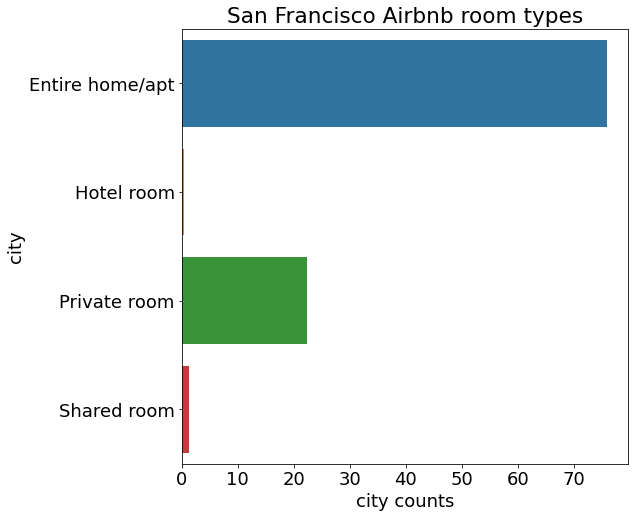

In [86]:
# visualize the popularity of room types San Francisco

visualize_popular_room_types(sf_listings, '%count', 'room_type', 'San Francisco')

<b><p>Entire home is the most popular room type in Austin with above 70% while Hotel room is the least popular</p></b>